In [112]:
# Import Dependencies
import csv
import pandas as pd
import matplotlib.pyplot as plt
from cycler import cycler
%matplotlib inline

In [113]:
# Pull in Lake CSV
Lakes_CSV = pd.read_csv("../csv data/Rivers and Lakes/Lakes.csv")
# Pull in Rivers CSV
Rivers_CSV = pd.read_csv("../csv data/Rivers and Lakes/Rivers.csv")
# Pull in Lakes Site Joiner CSV
Lakes_Site_Joiner_CSV = pd.read_csv("../csv data/Rivers and Lakes/Lakes Site Joiner.csv")
# Pull in Rivers Site Joiner CSV
Rivers_Site_Joiner_CSV = pd.read_csv("../csv data/Rivers and Lakes/Rivers Site Joiner.csv")

# Remove unnecessary fields in Lake CSV
Clean_Lakes_CSV = Lakes_CSV[["site_no", "year_nu", "month_nu", "mean_va"]]
# Set index to prep for join
Lakes_Site_Joiner_CSV = Lakes_Site_Joiner_CSV.set_index("site_no")
# Combine dataset with joiner table to get proper river names accross multiple station numbers
Final_Clean_Lakes_CSV = Clean_Lakes_CSV.join(Lakes_Site_Joiner_CSV, on=["site_no"])
# Create concatenated date field in format "YEAR-Month"
Final_Clean_Lakes_CSV["Date"] = Final_Clean_Lakes_CSV["year_nu"].astype(str) + "-" + Final_Clean_Lakes_CSV["month_nu"].astype(str)

# Remove unnecessary fields in Rivers CSV
Clean_Rivers_CSV = Rivers_CSV[["site_no", "parameter_cd", "year_nu", "month_nu", "mean_va"]]
# Set index to prep for join
Test_Rivers_Site_Joiner_CSV = Rivers_Site_Joiner_CSV.set_index("site_no")
# Combine dataset with joiner table to get proper lake/reservoir names
Test_Clean_Rivers_CSV = Clean_Rivers_CSV.join(Test_Rivers_Site_Joiner_CSV, on=["site_no"])
# Create concatenated date field in format "YEAR-Month"
Test_Clean_Rivers_CSV["Date"] = Test_Clean_Rivers_CSV["year_nu"].astype(str) + "-" + Test_Clean_Rivers_CSV["month_nu"].astype(str)

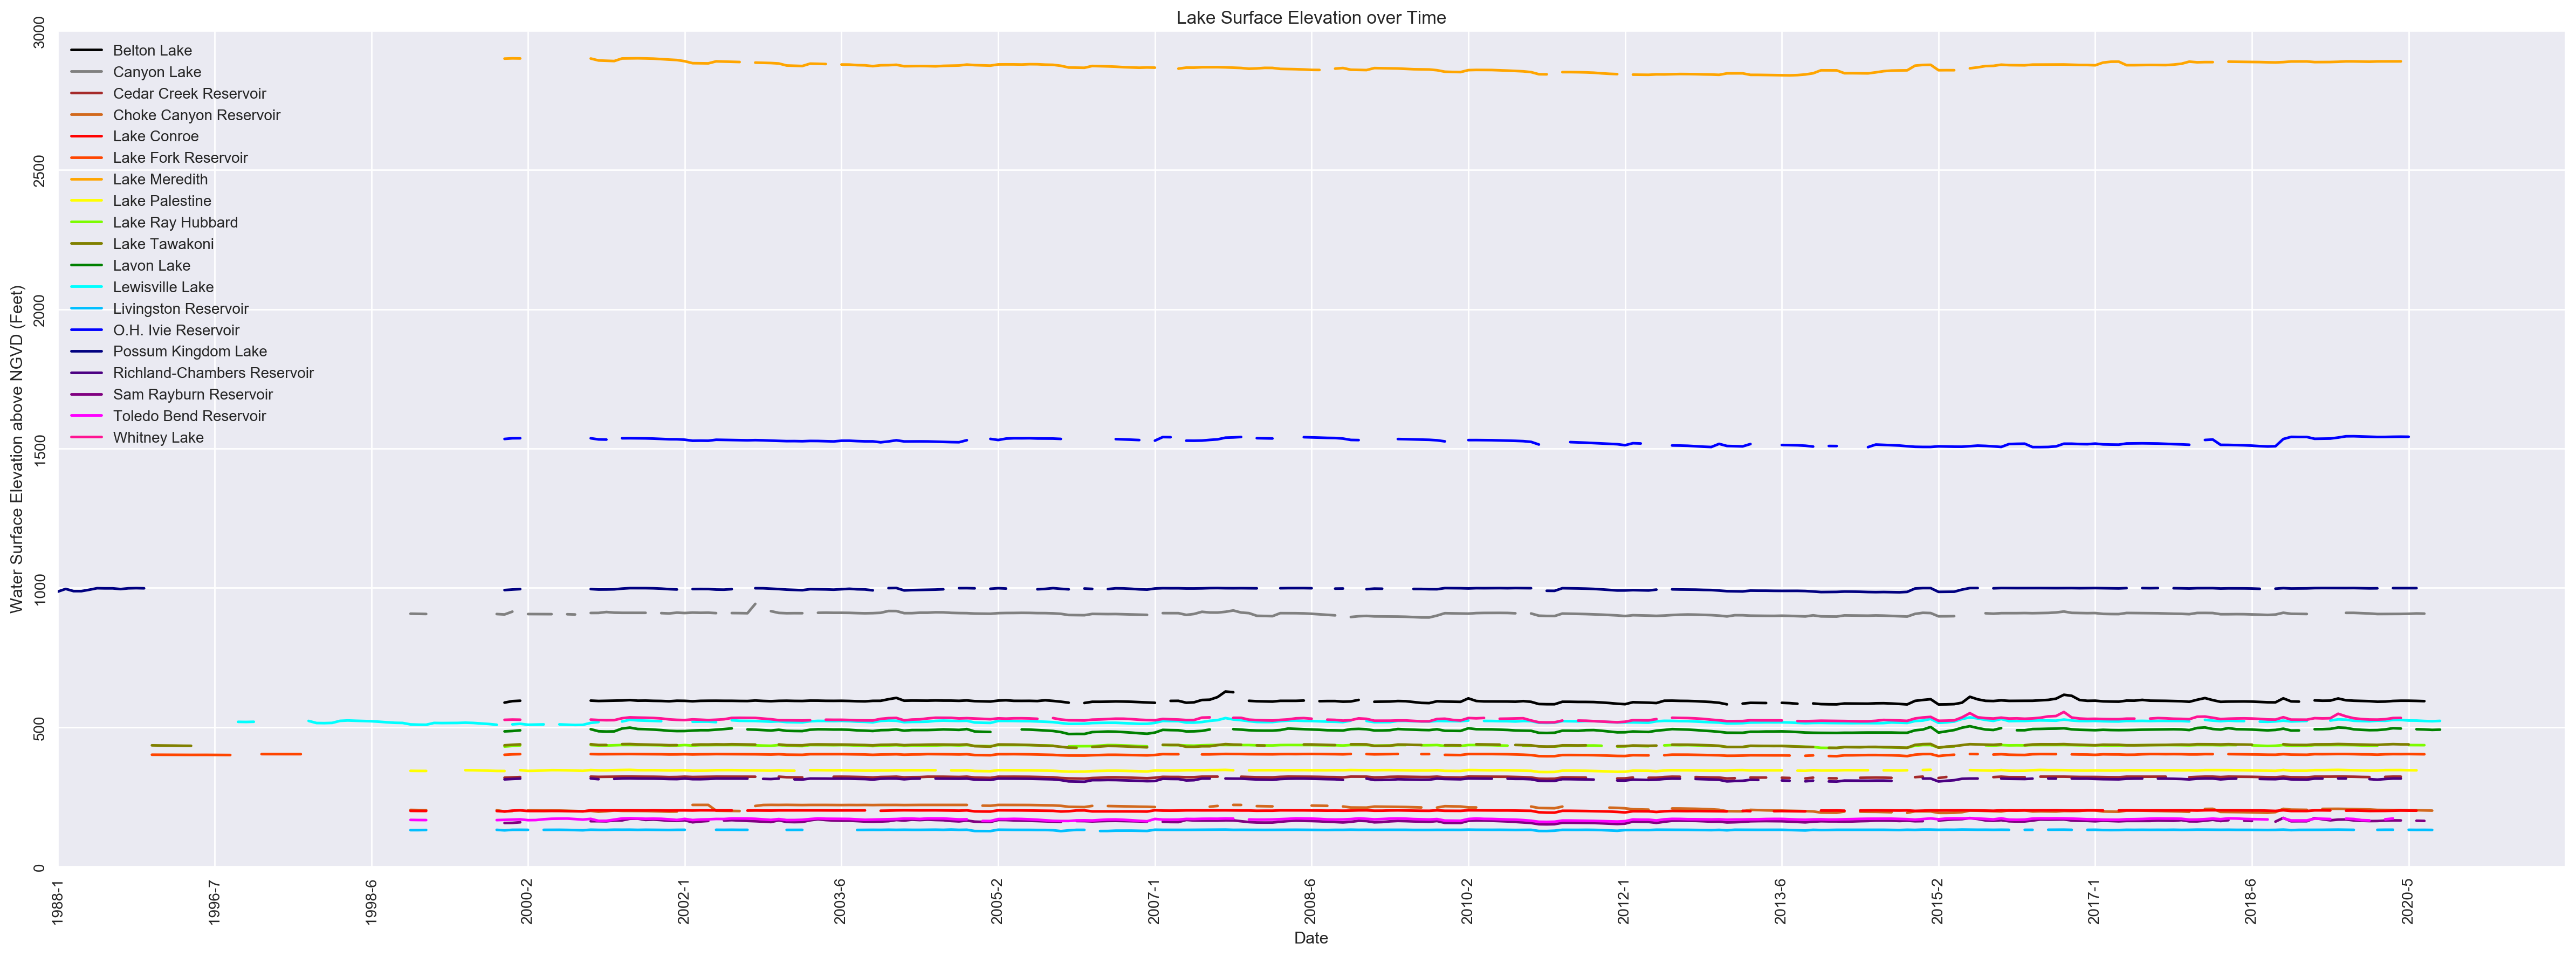

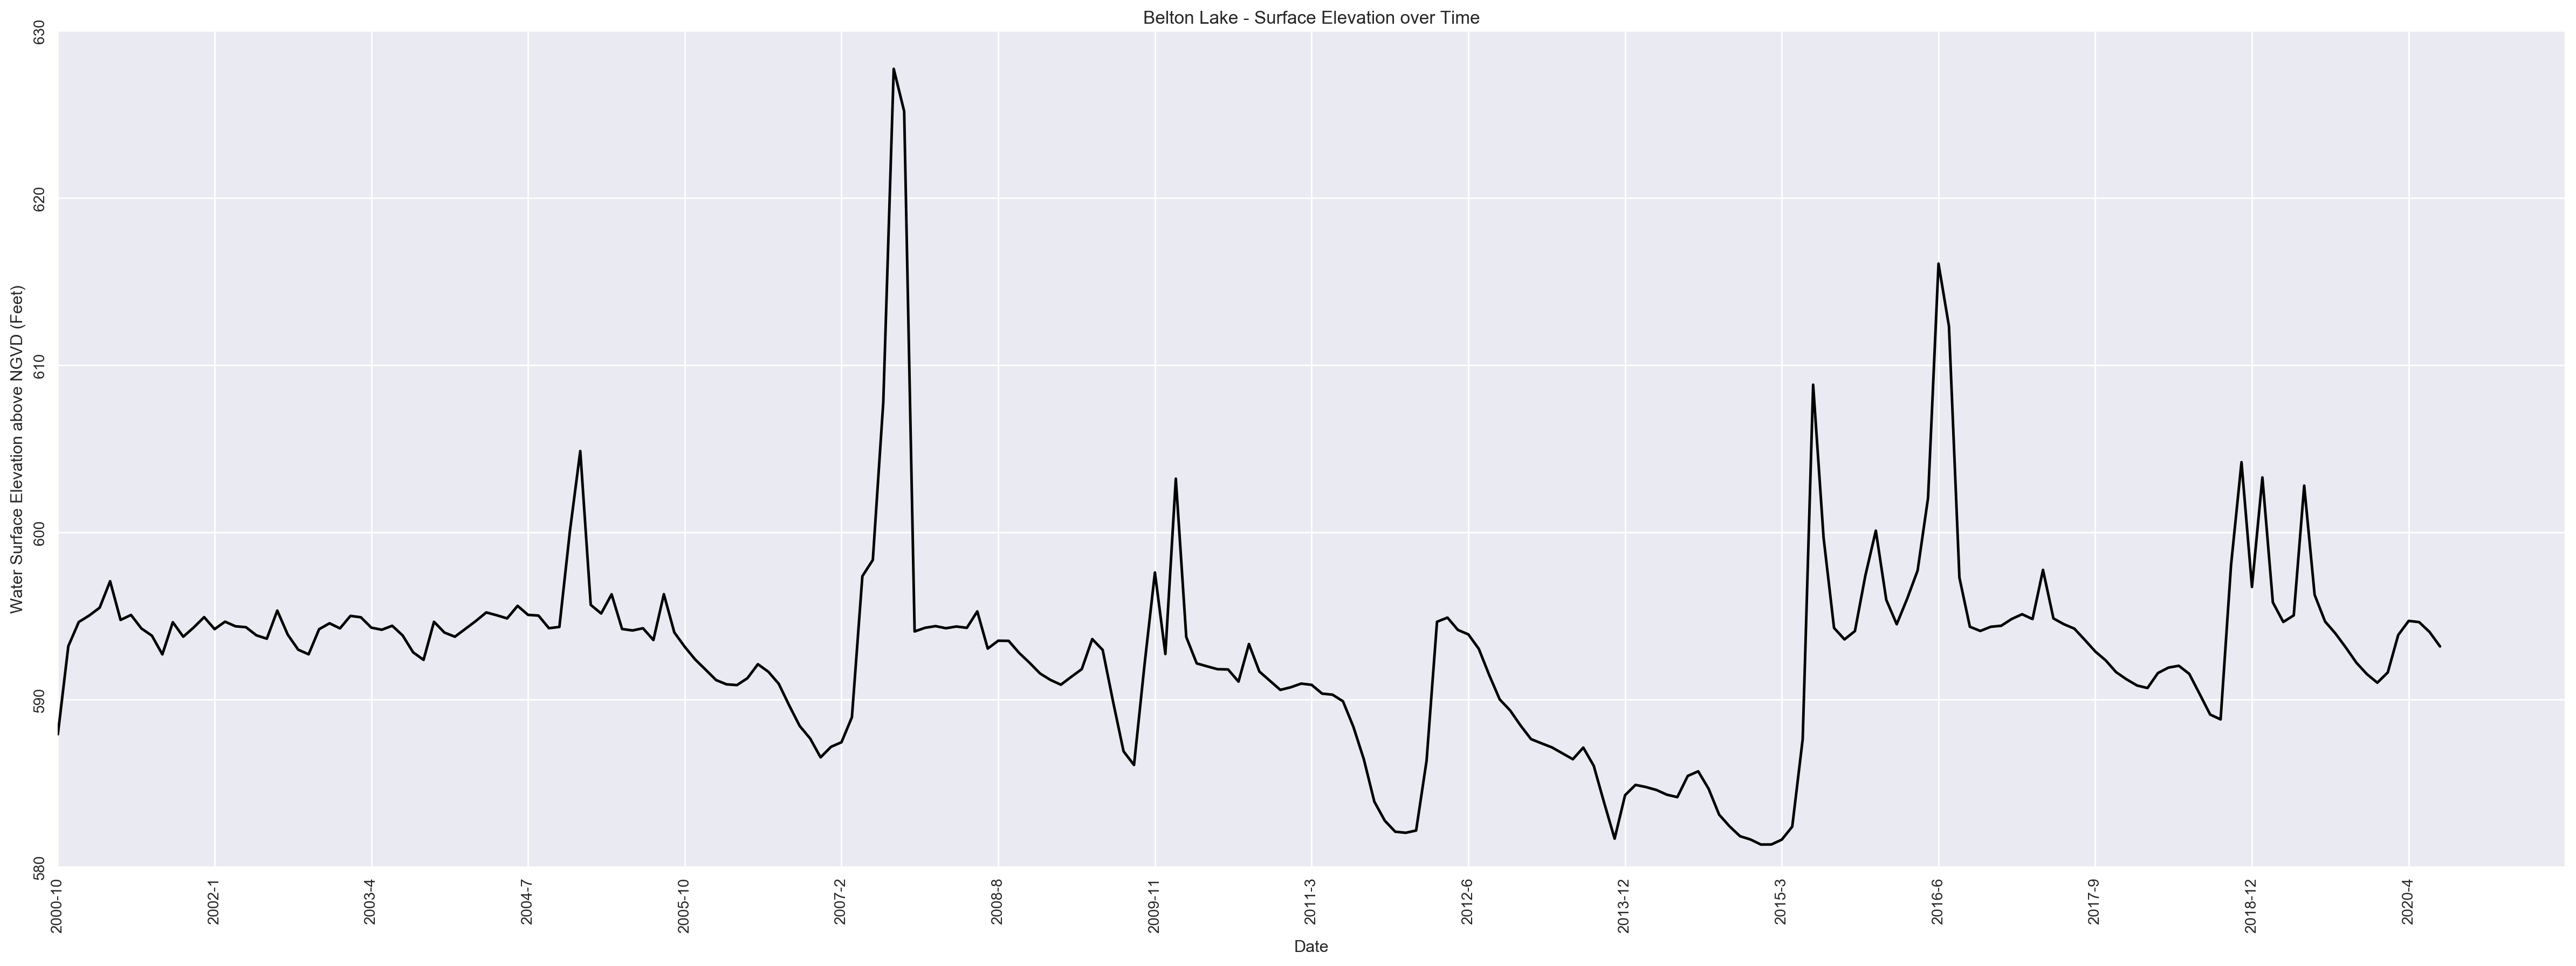

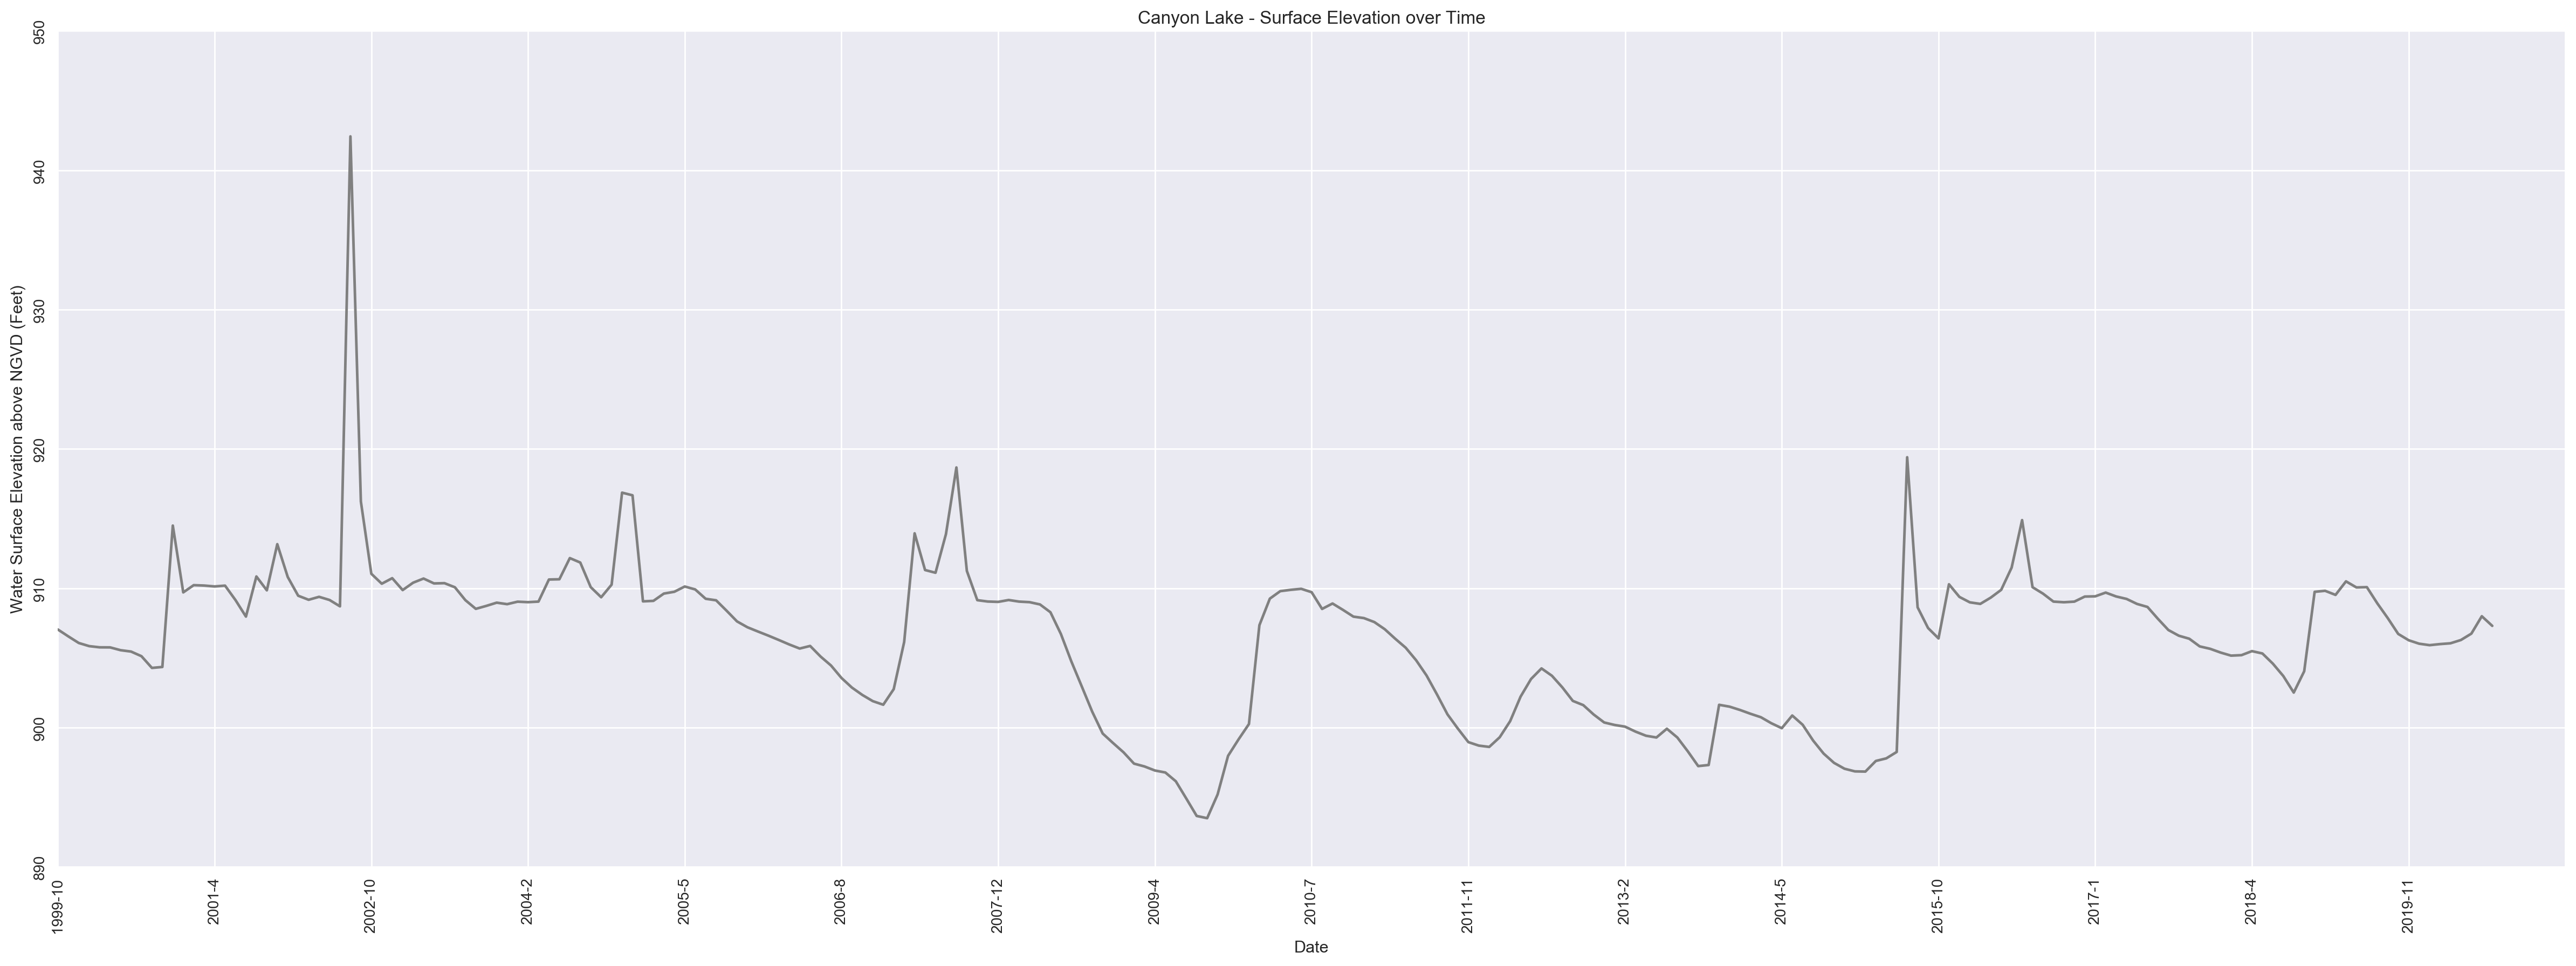

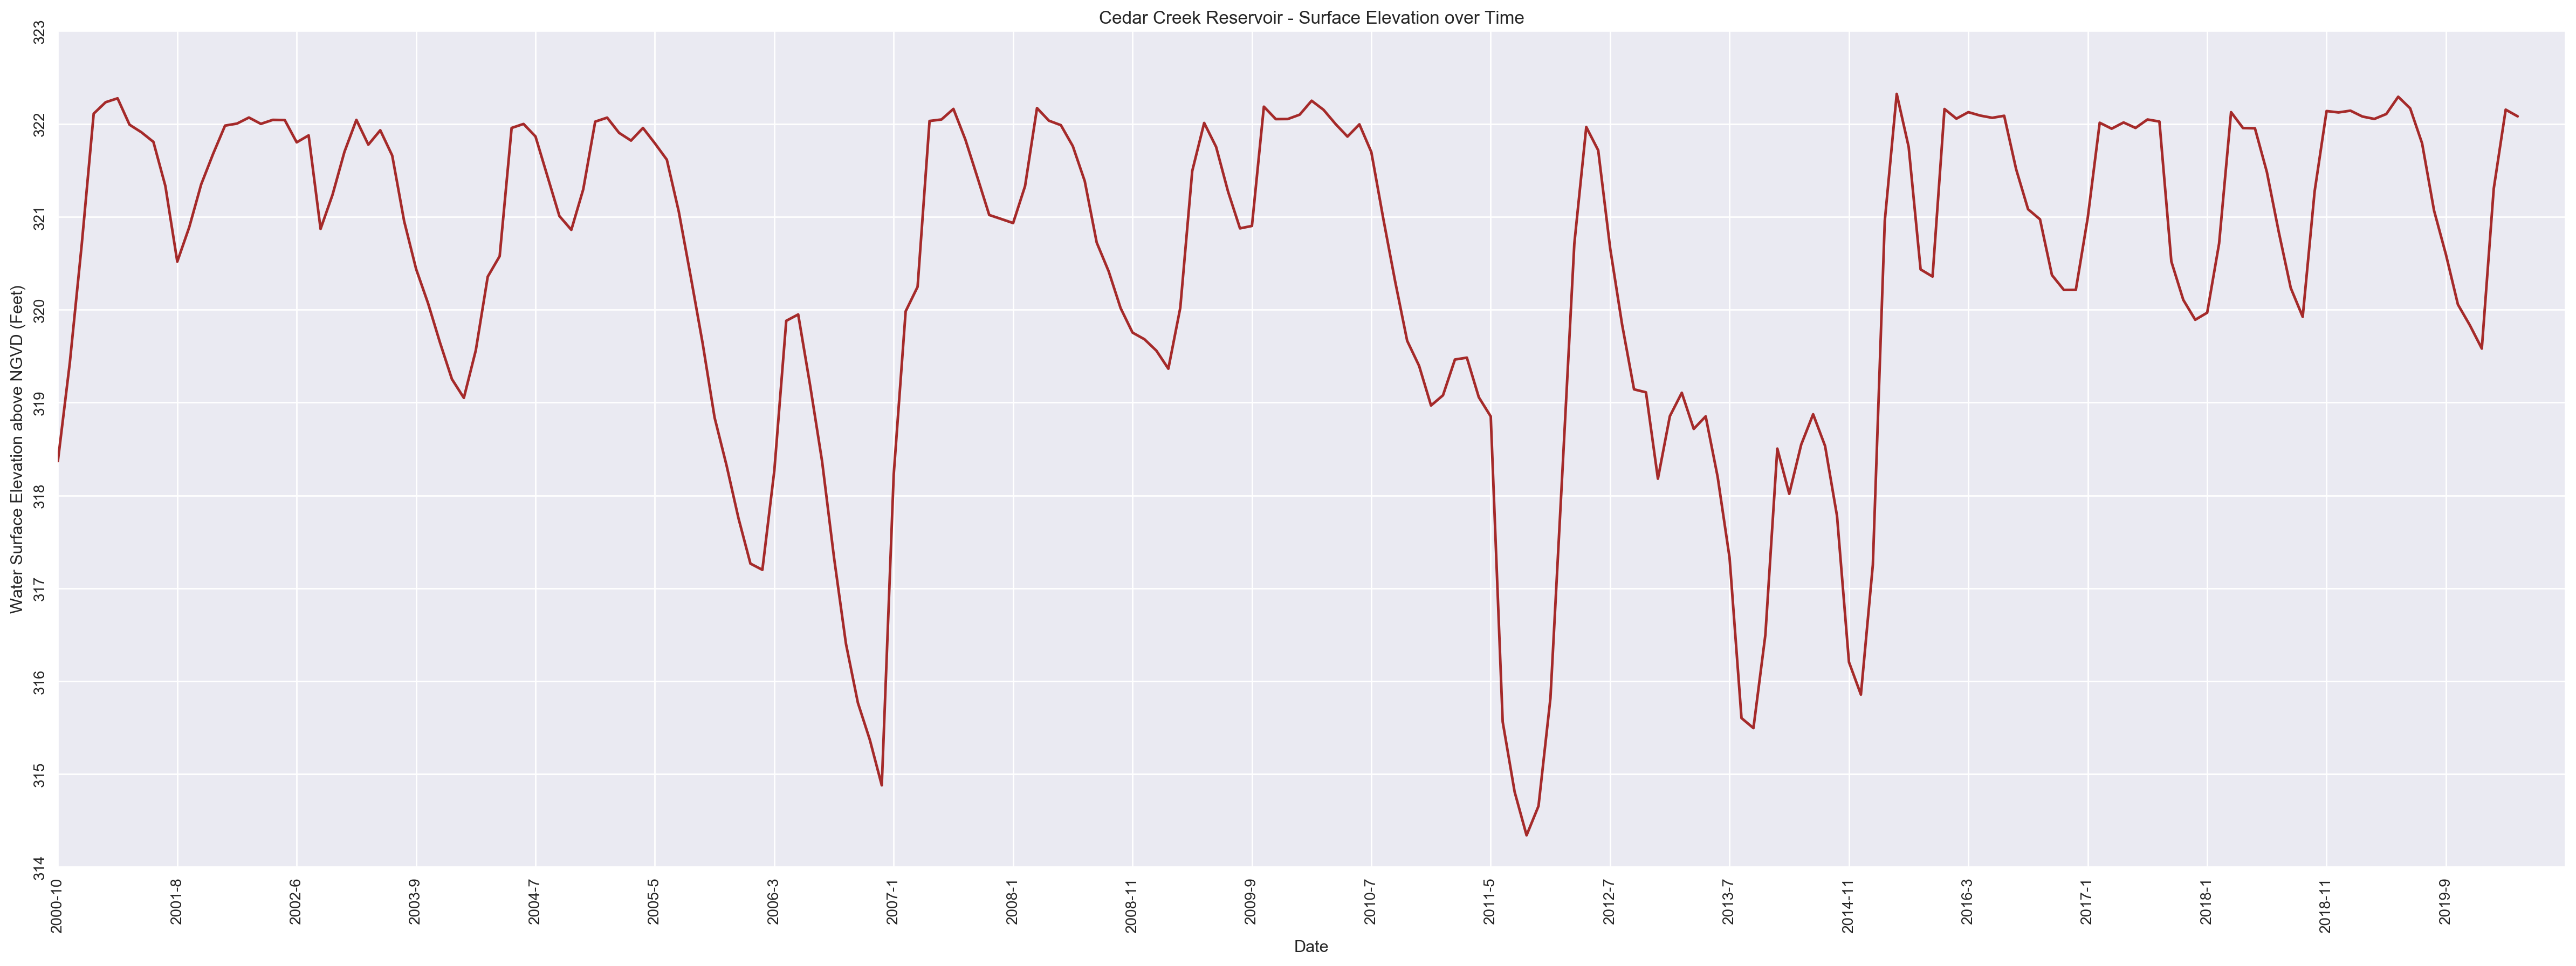

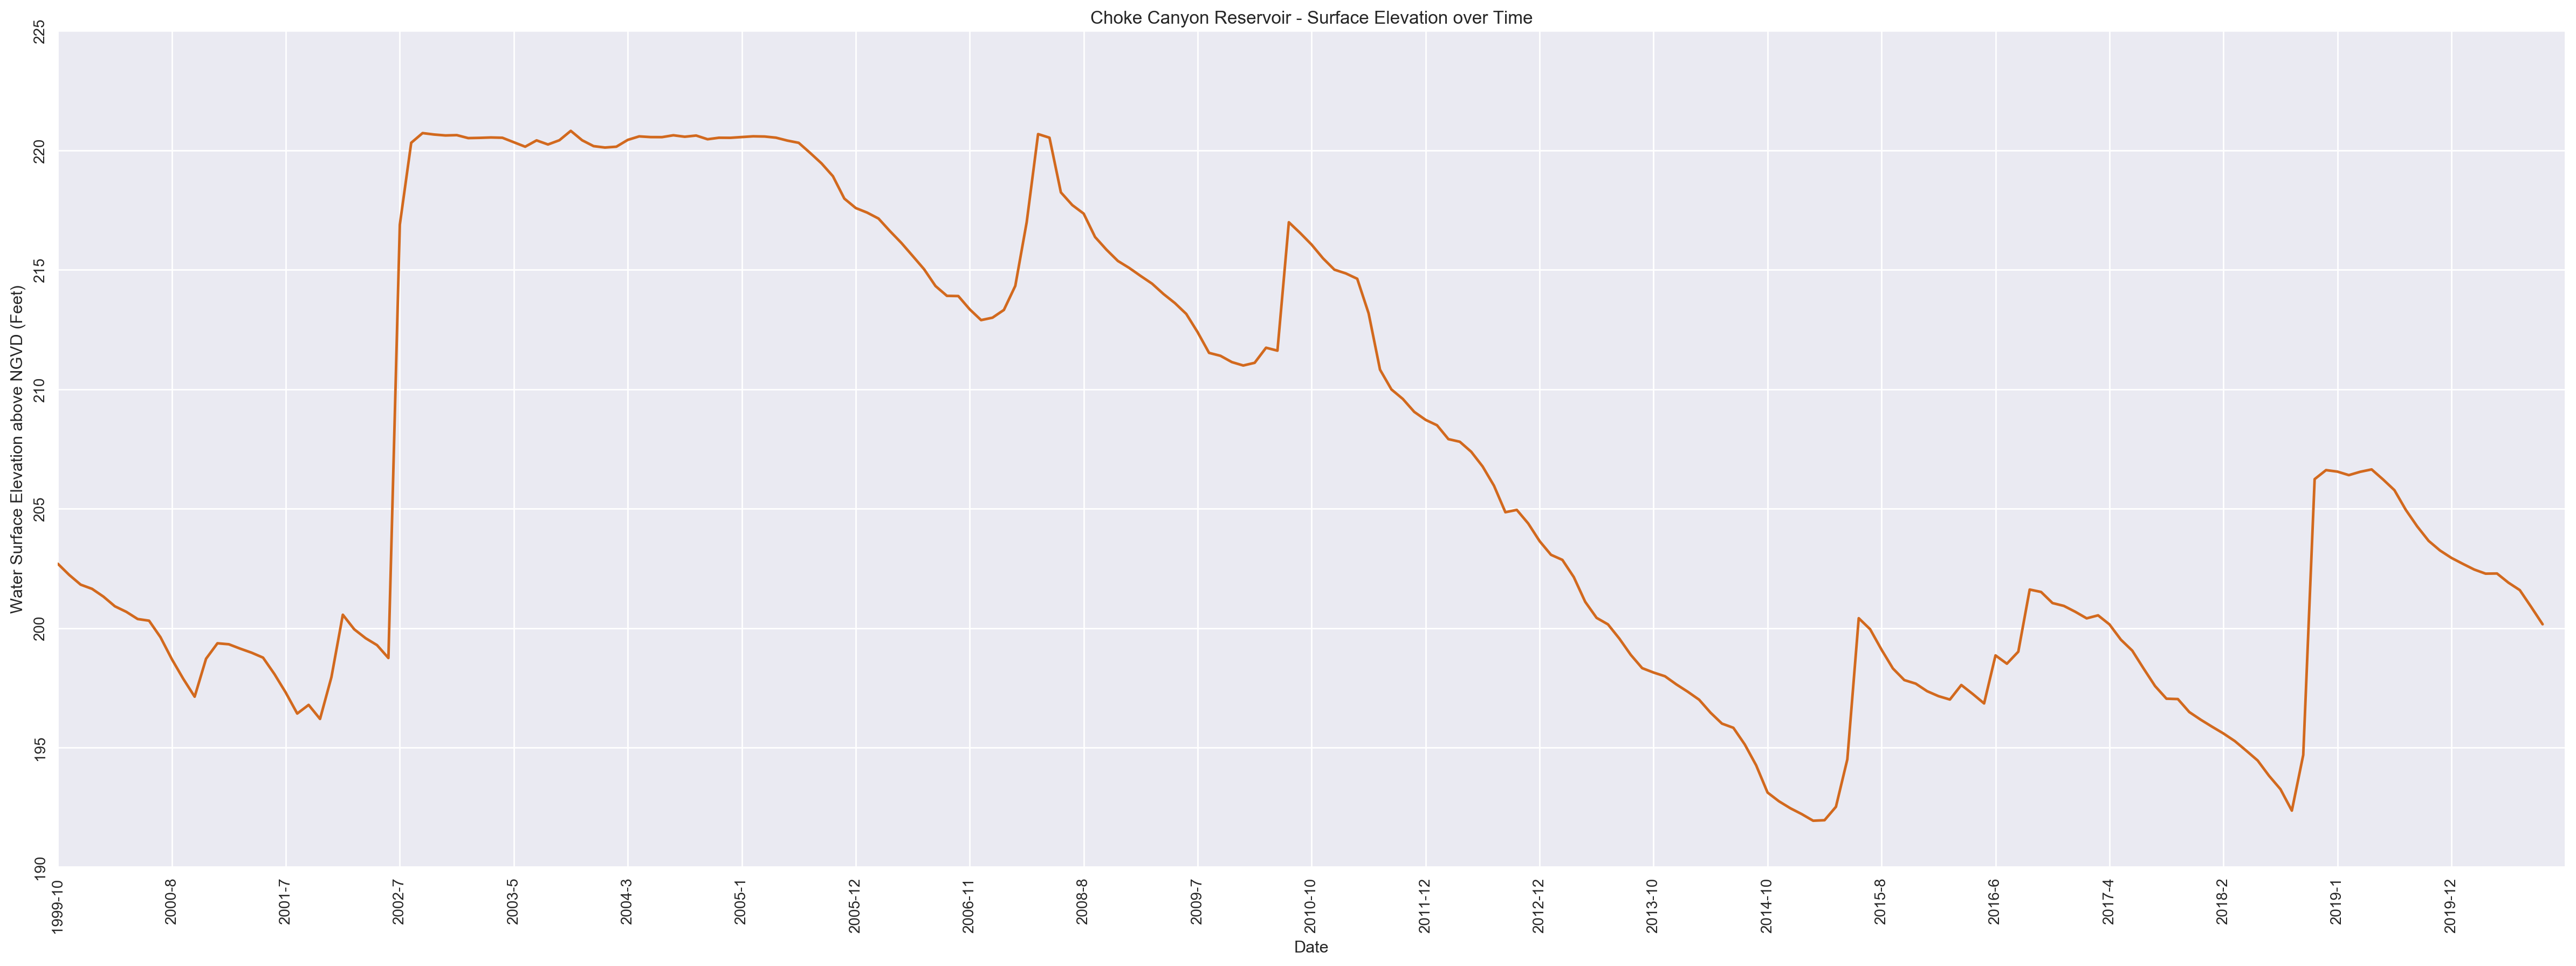

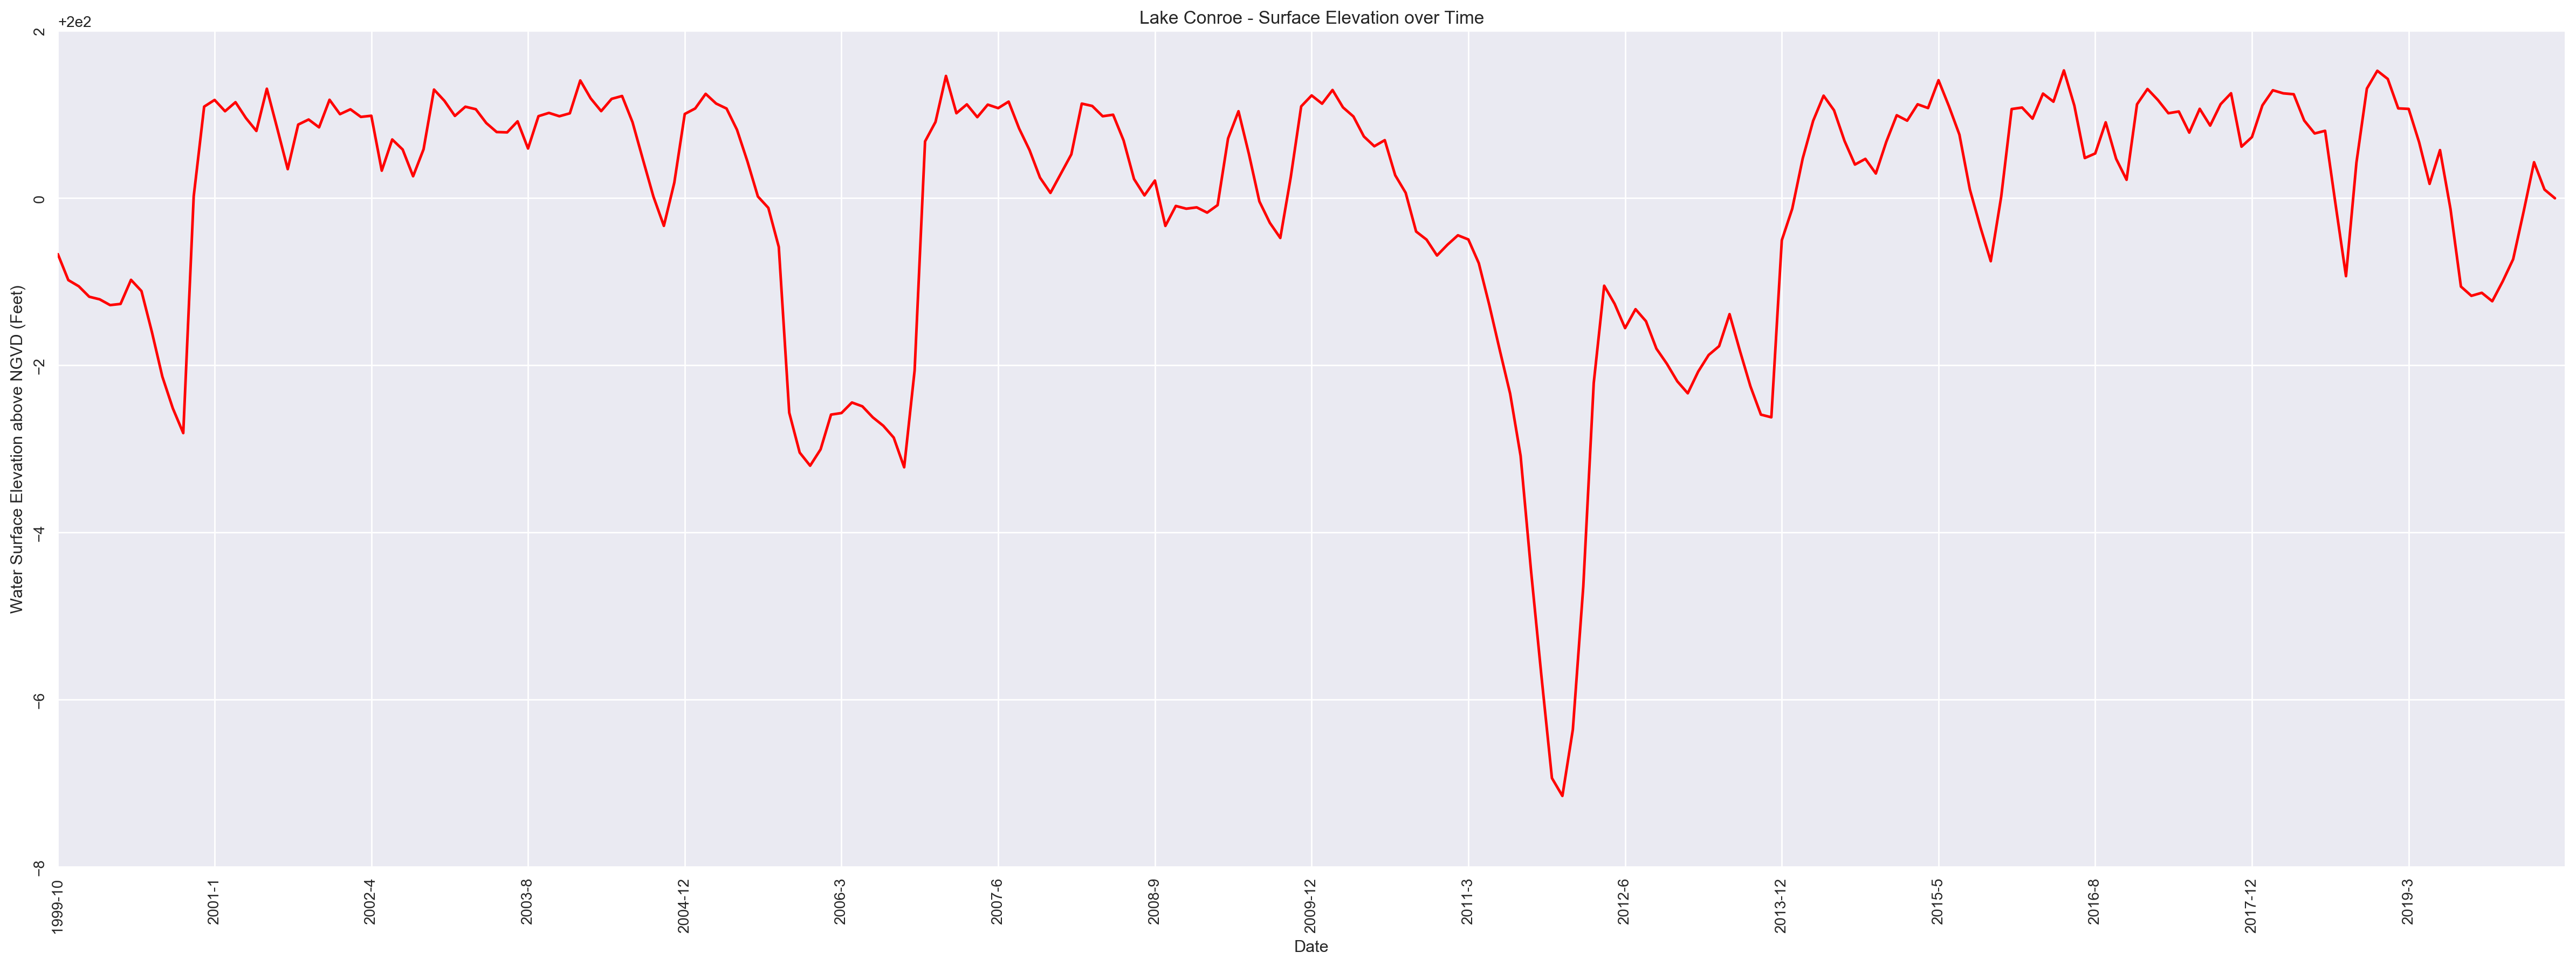

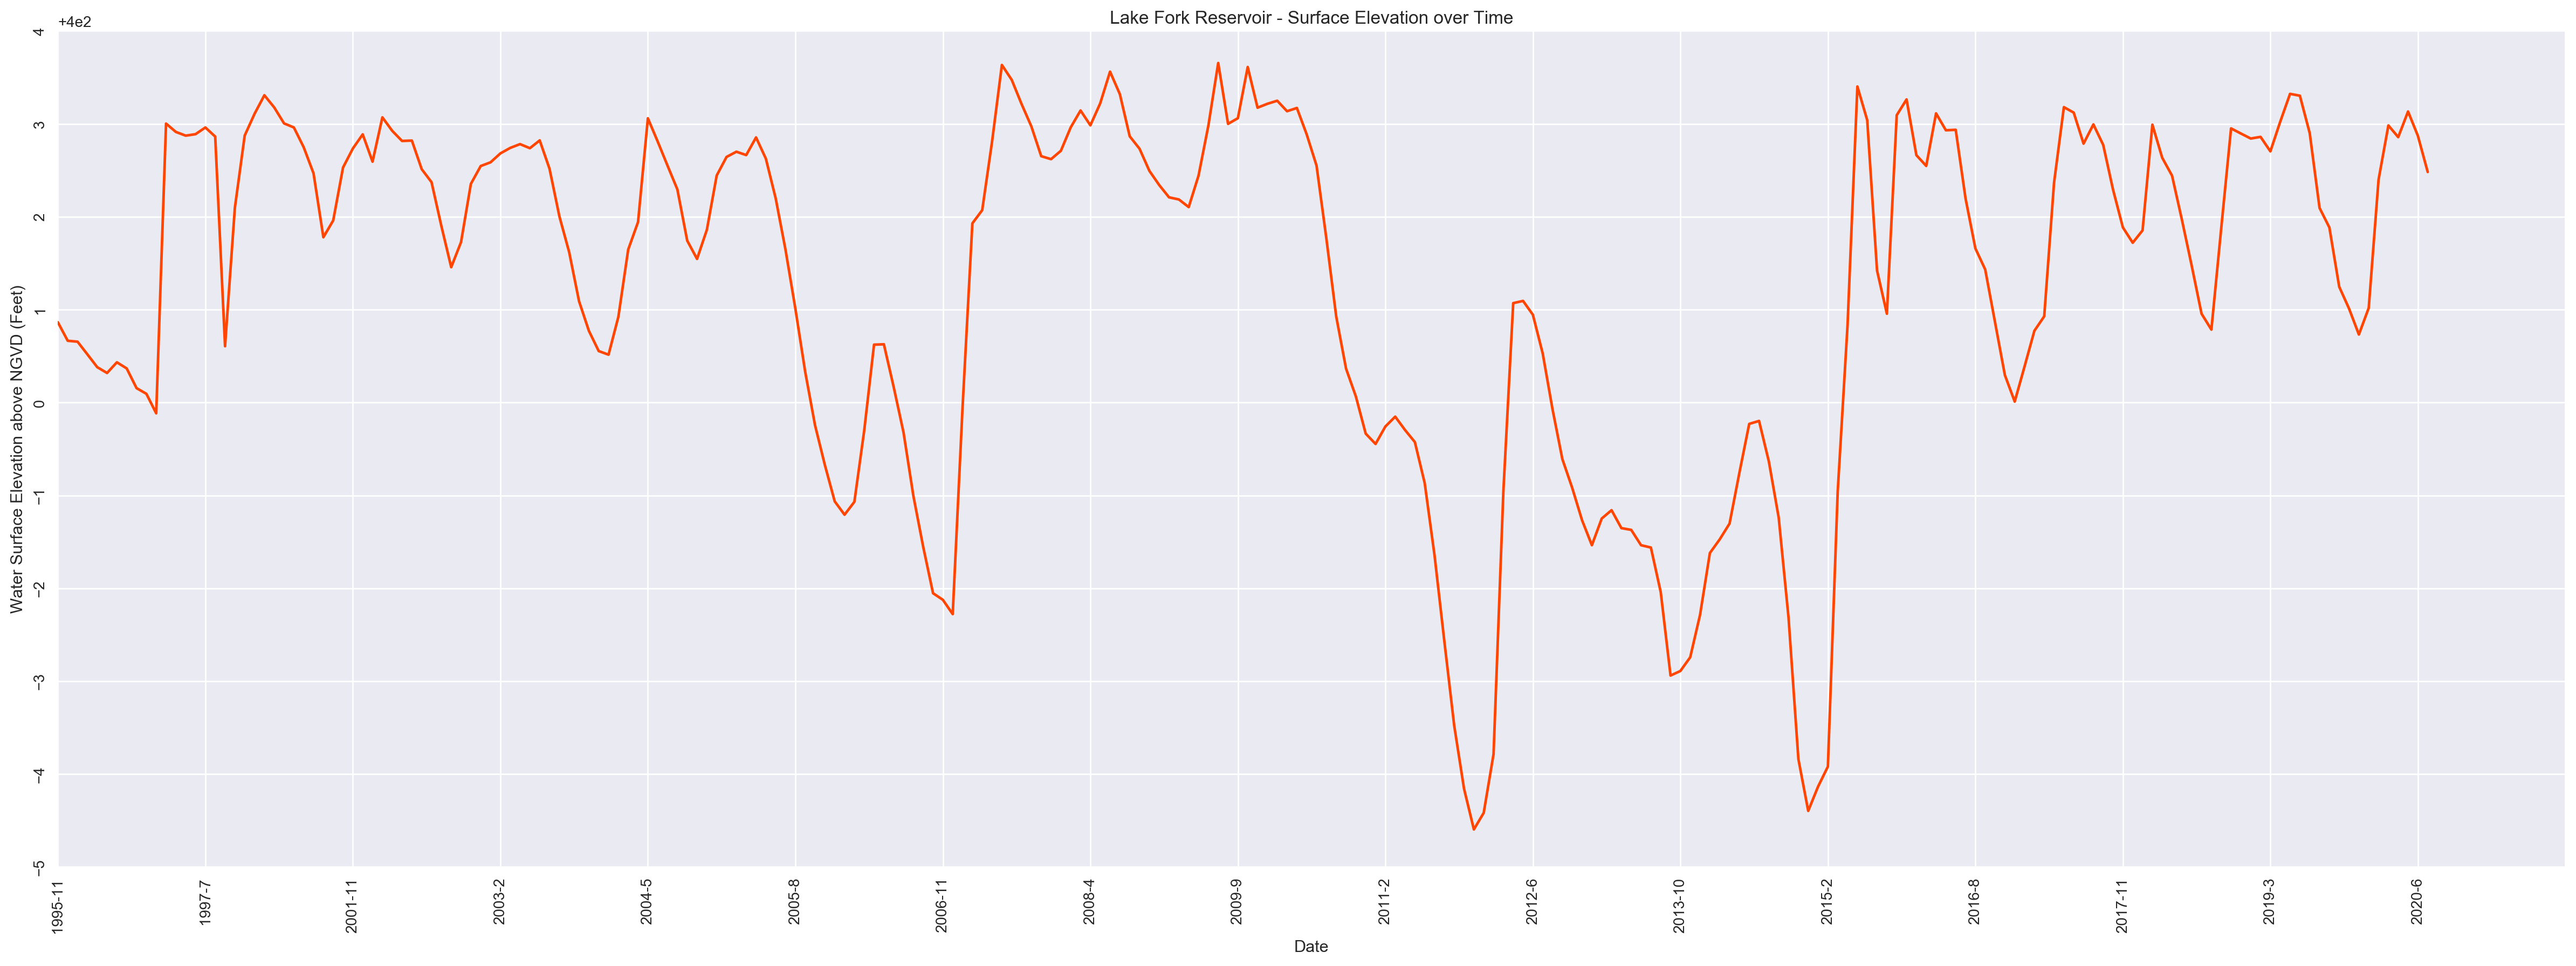

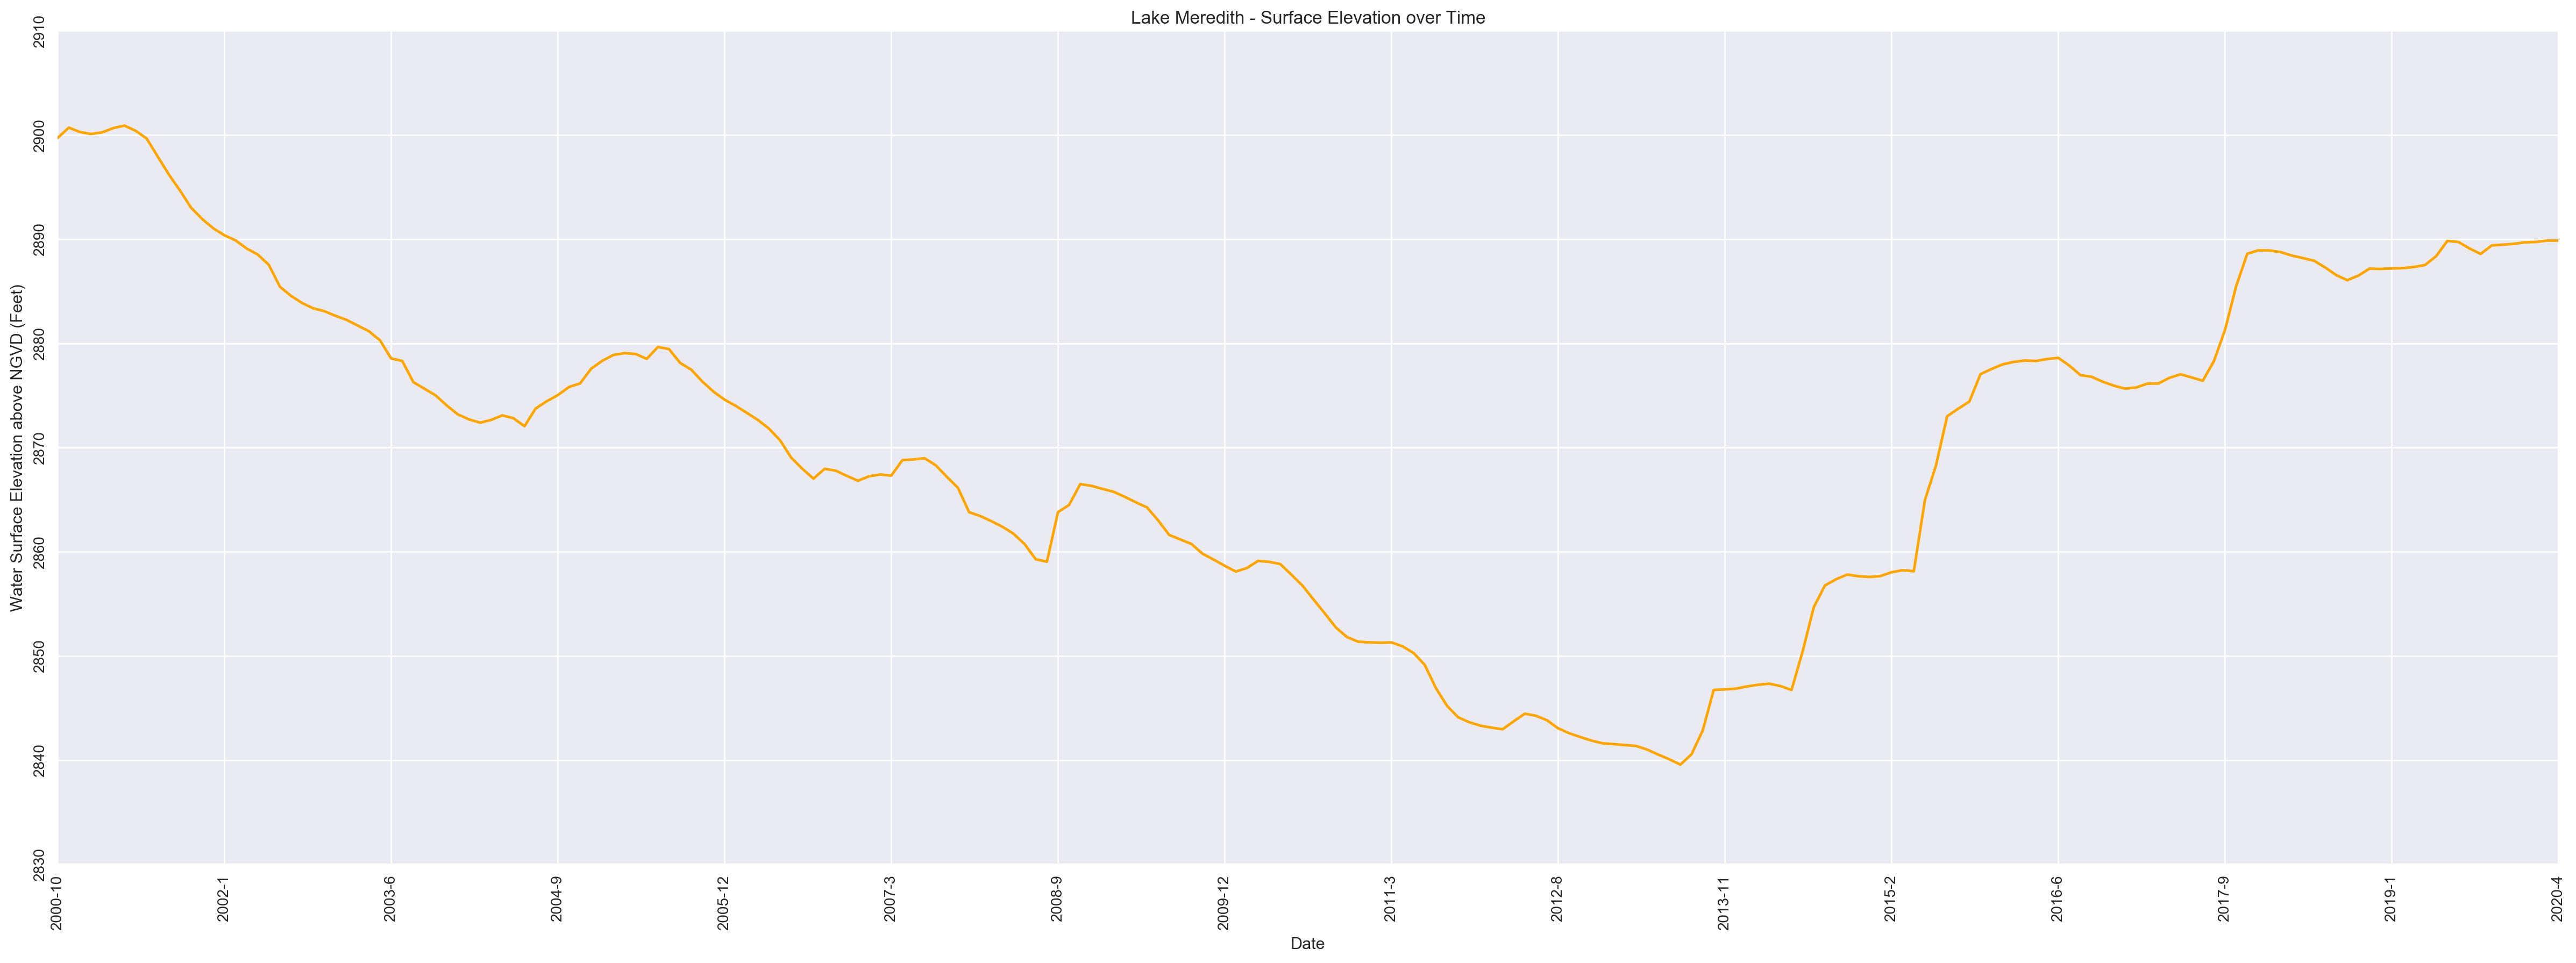

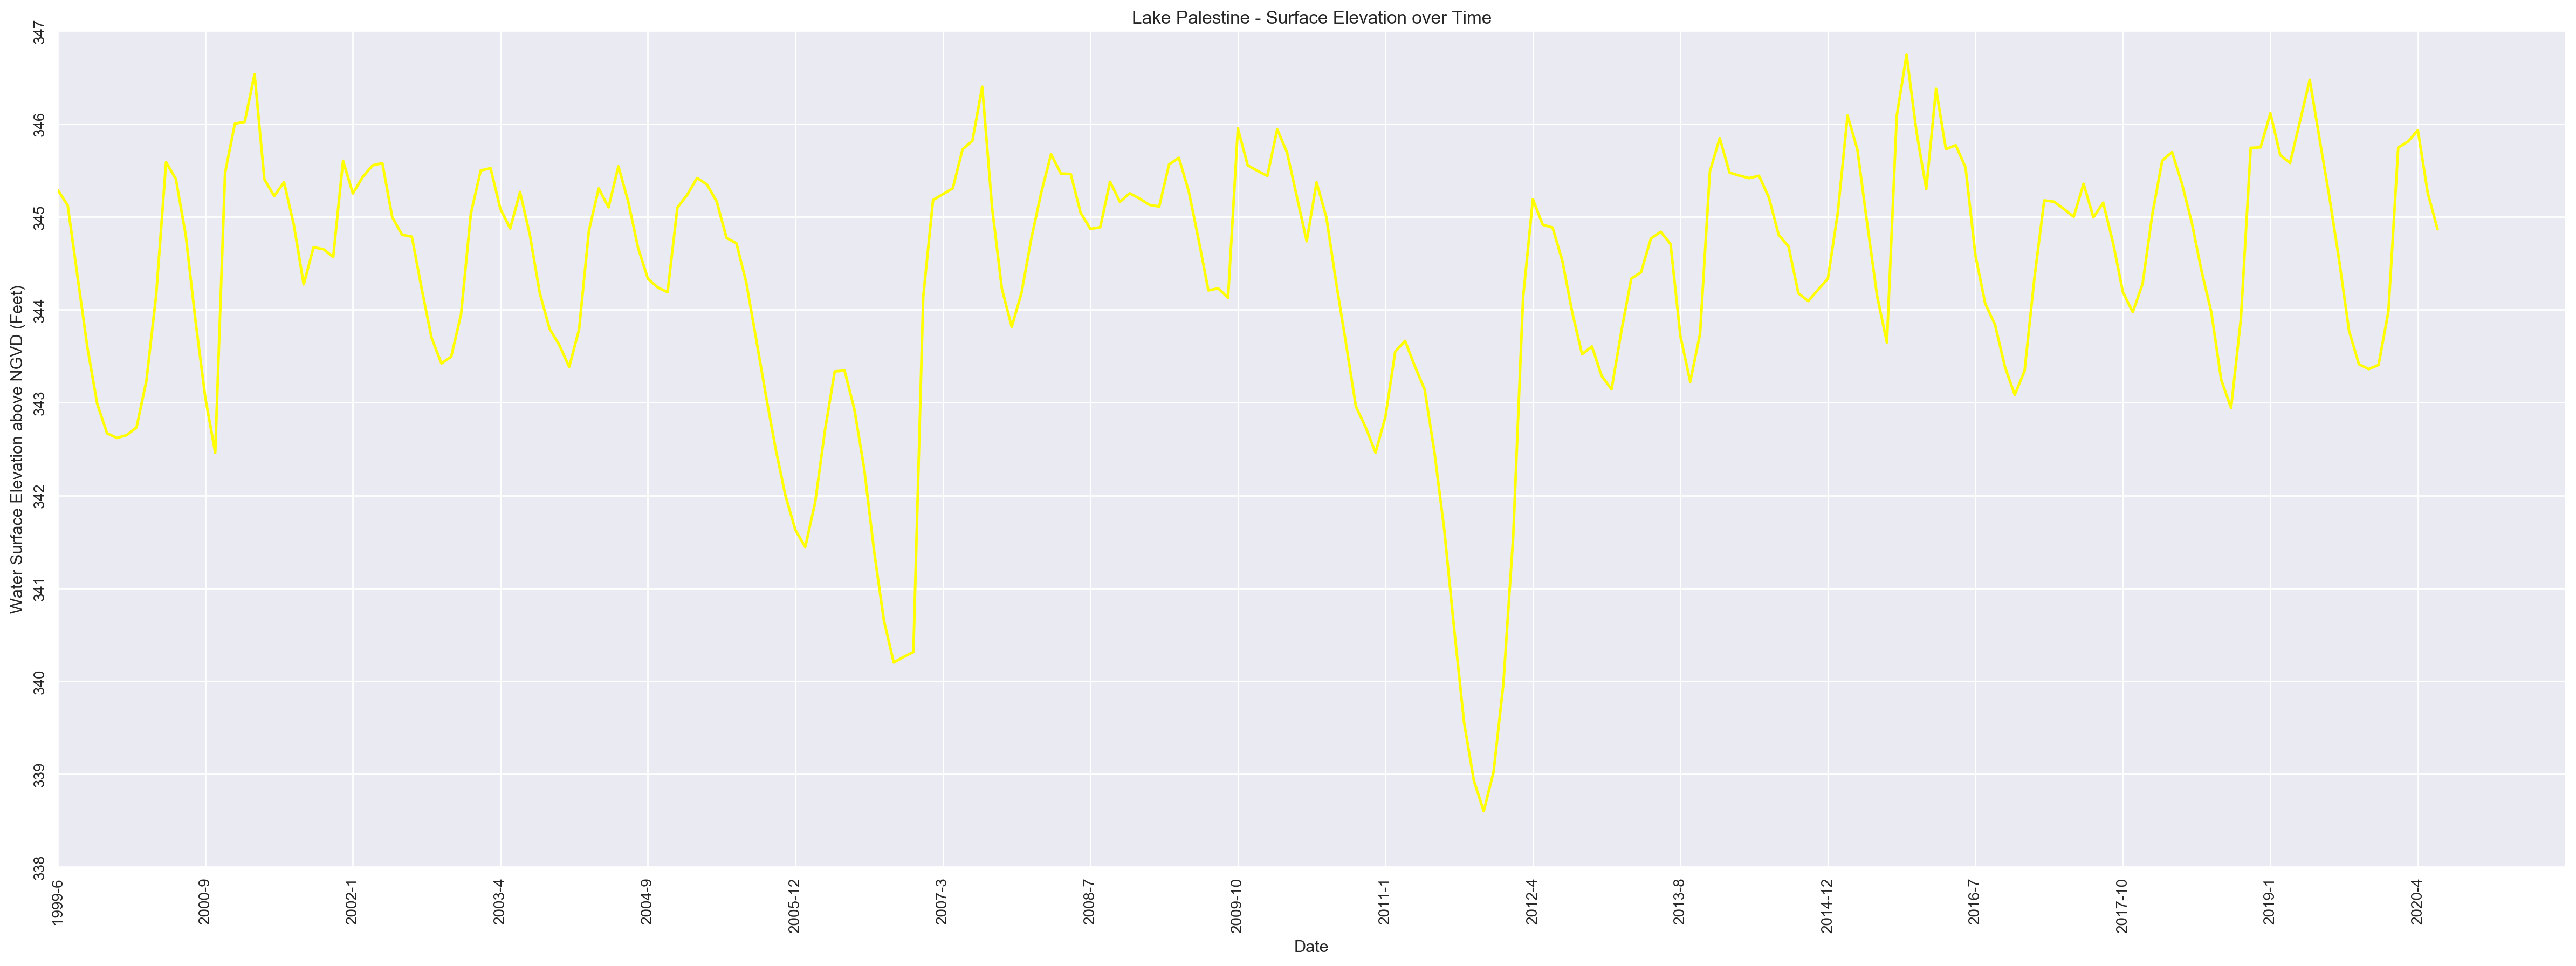

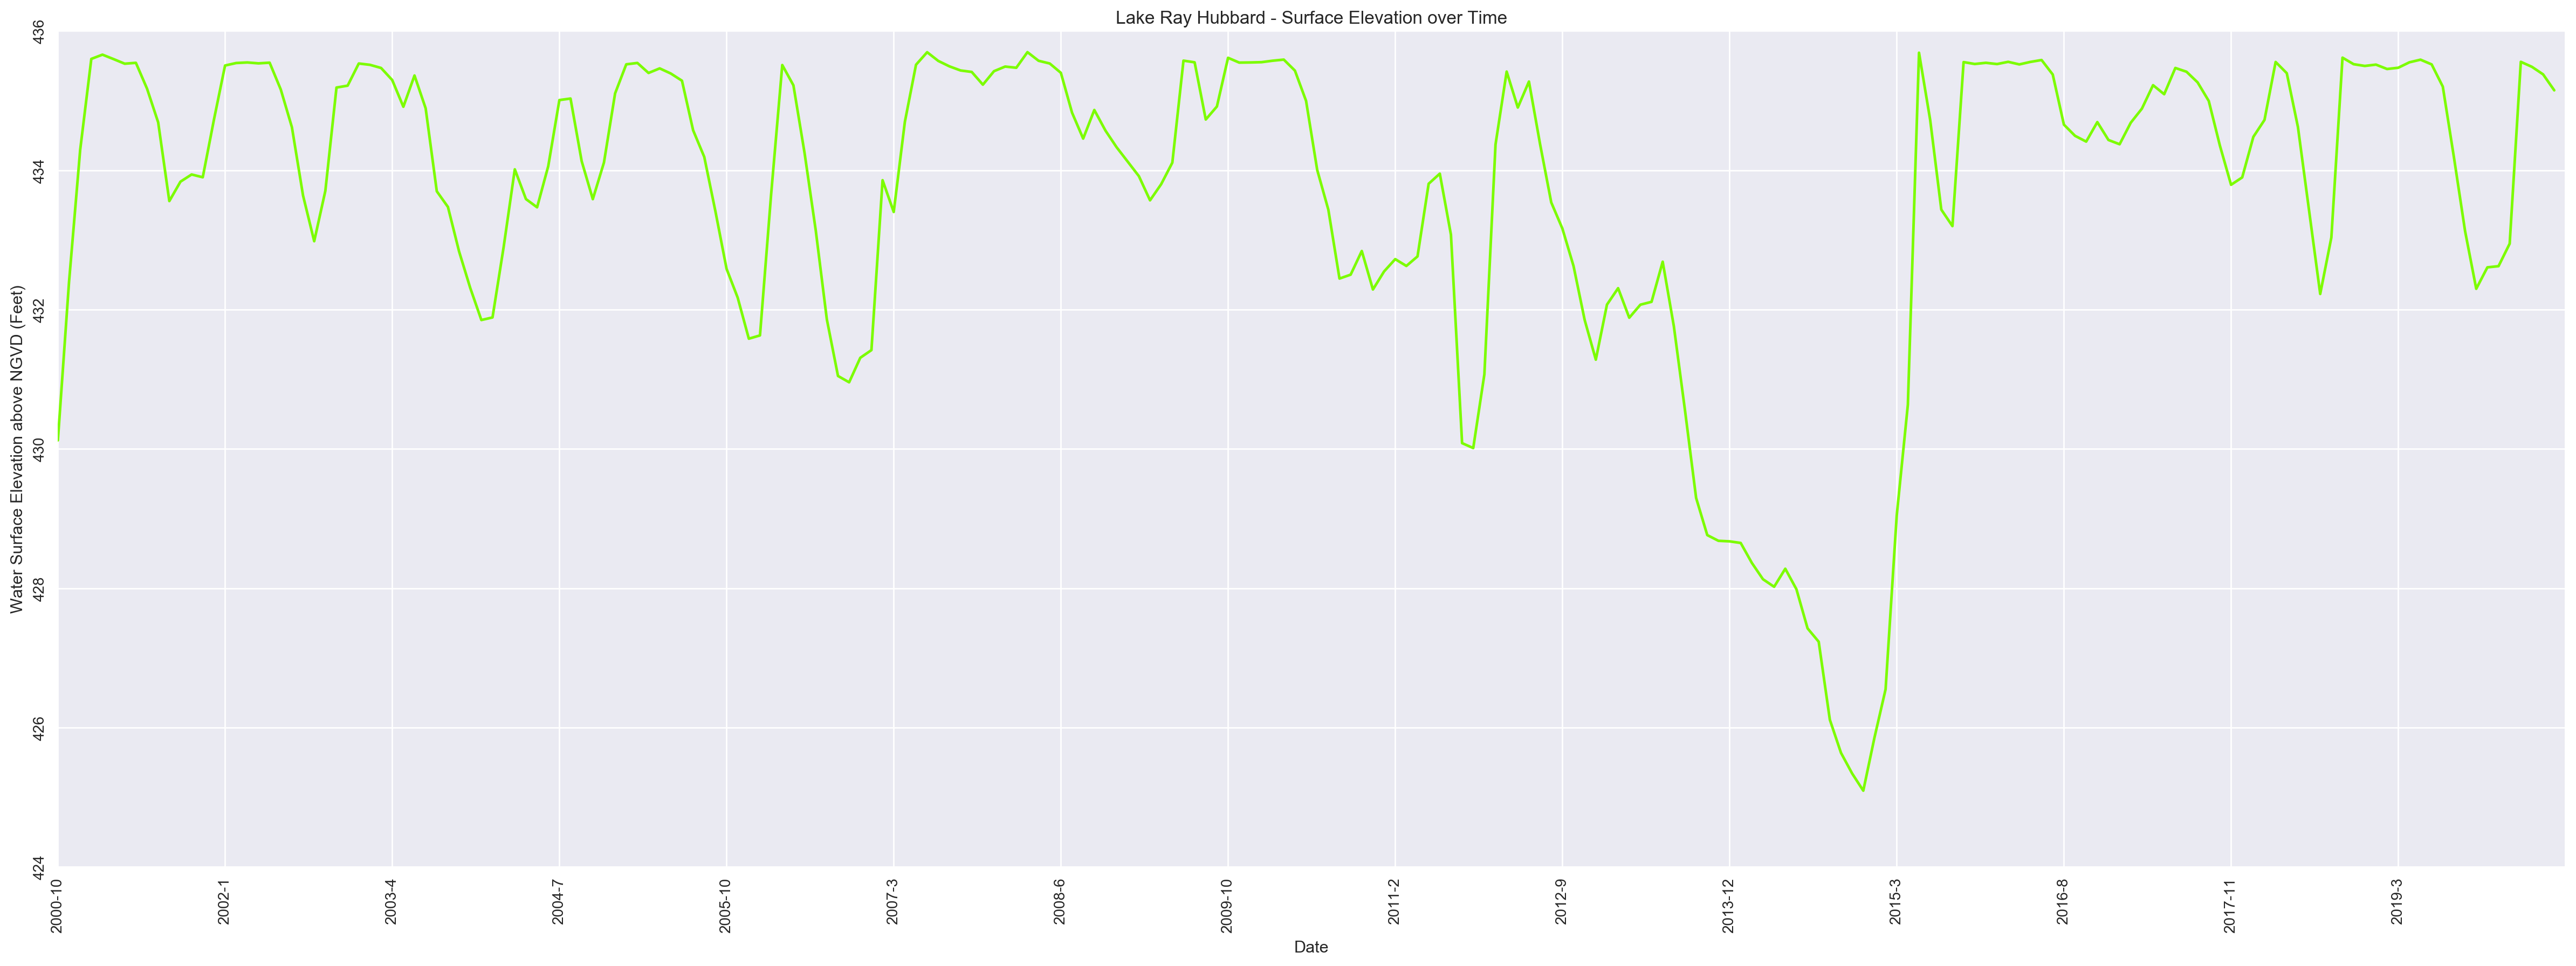

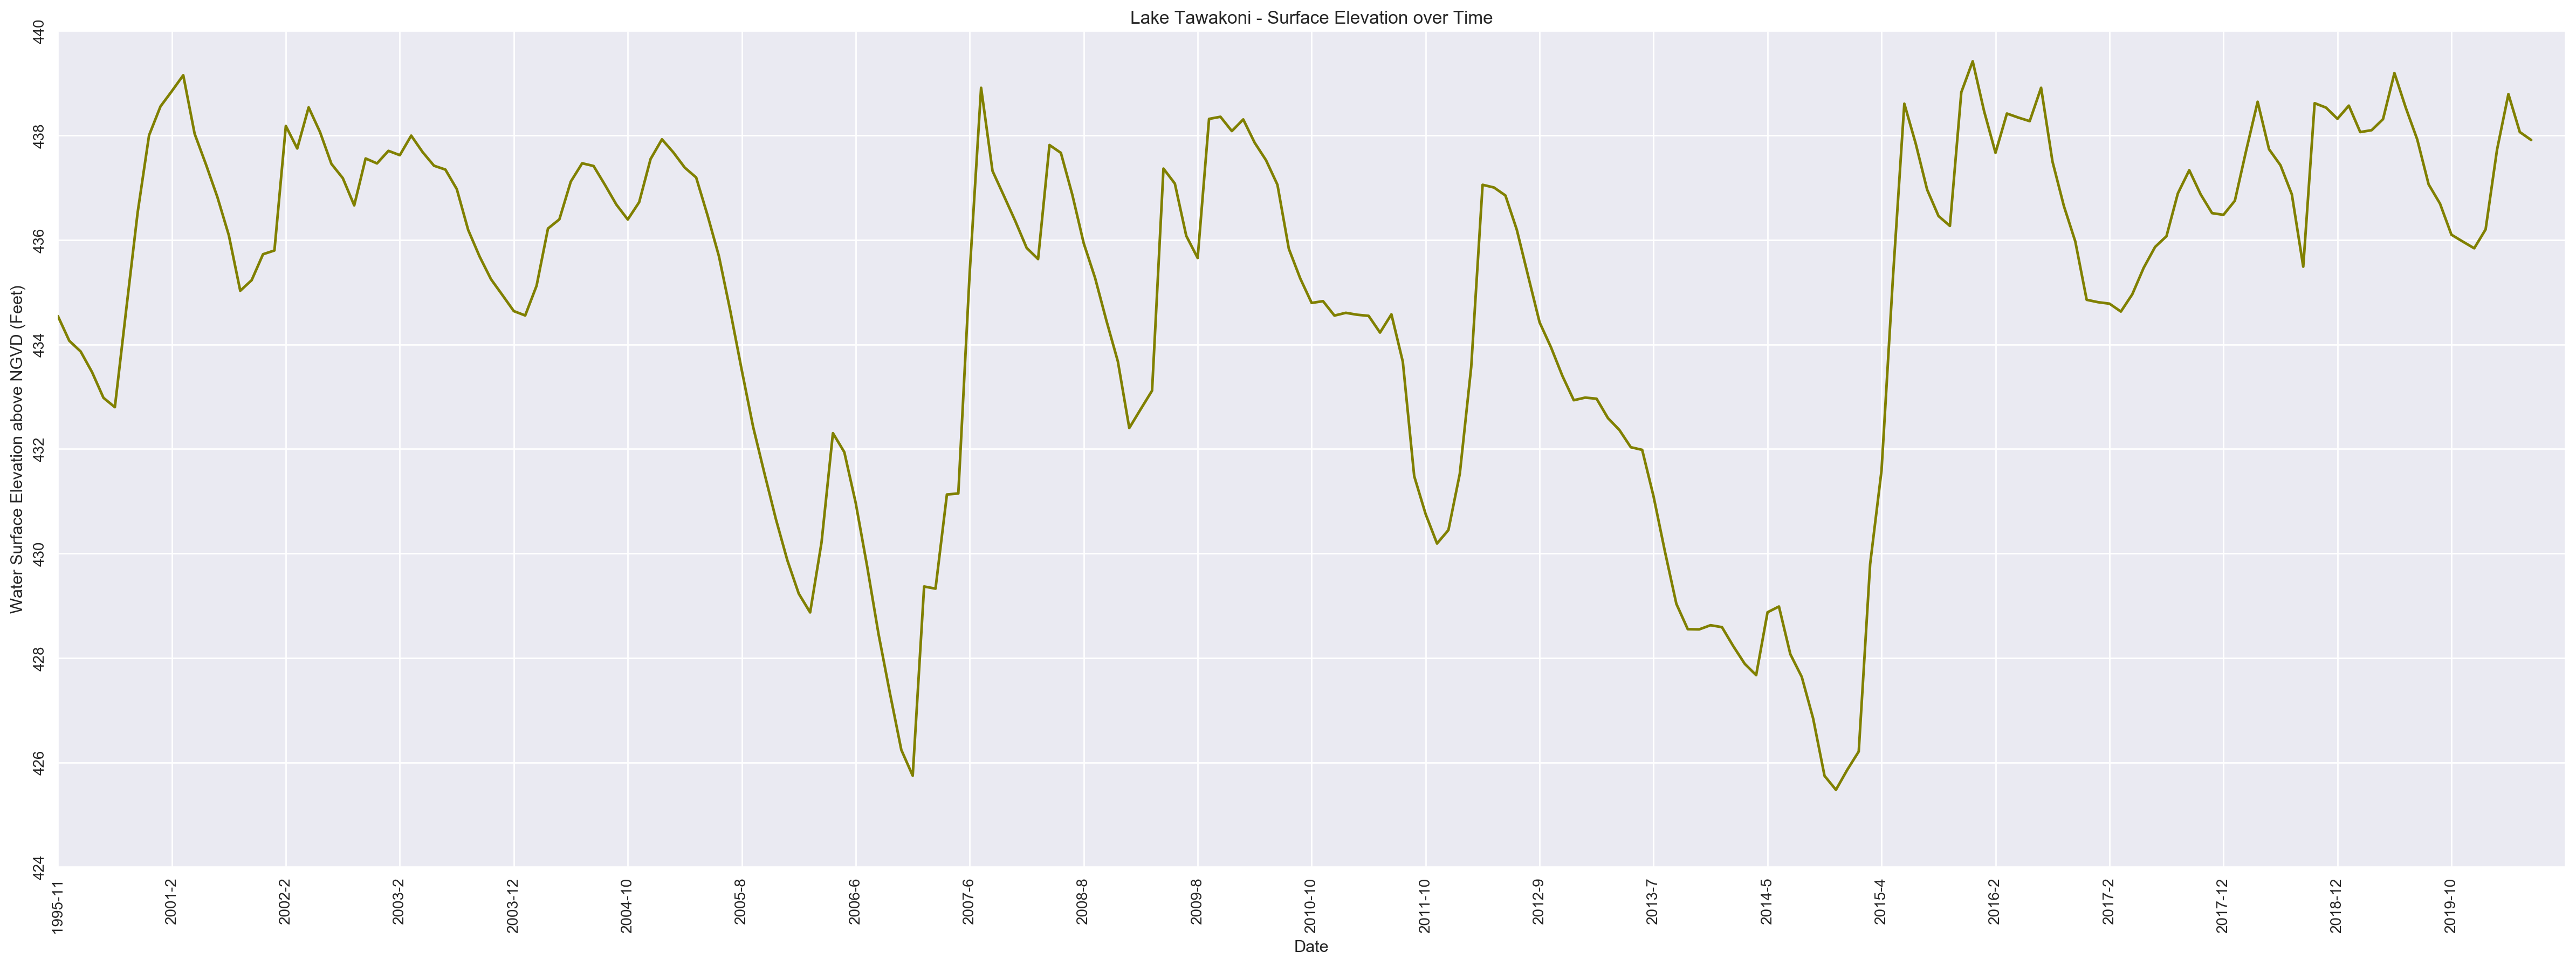

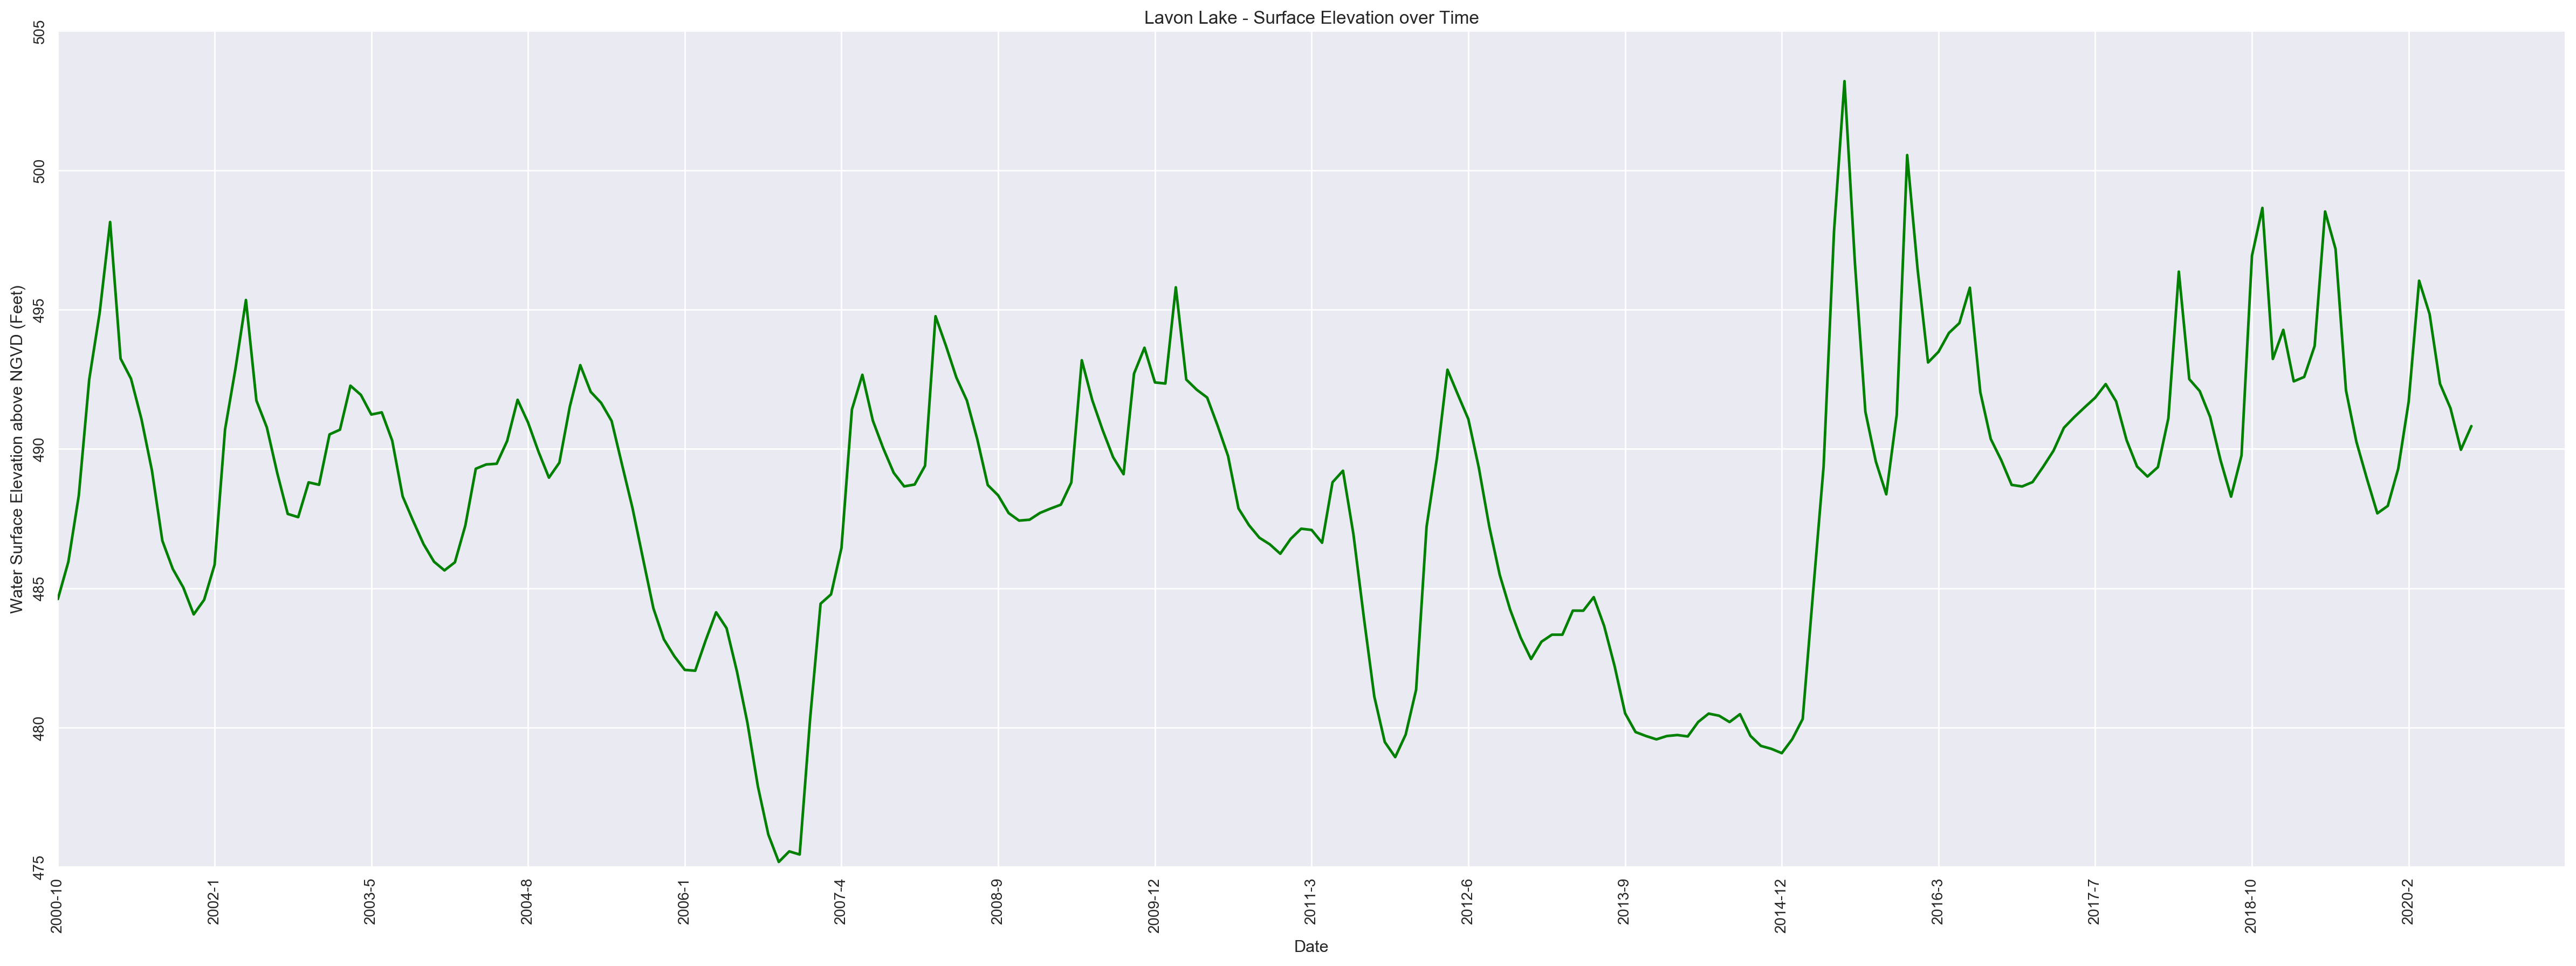

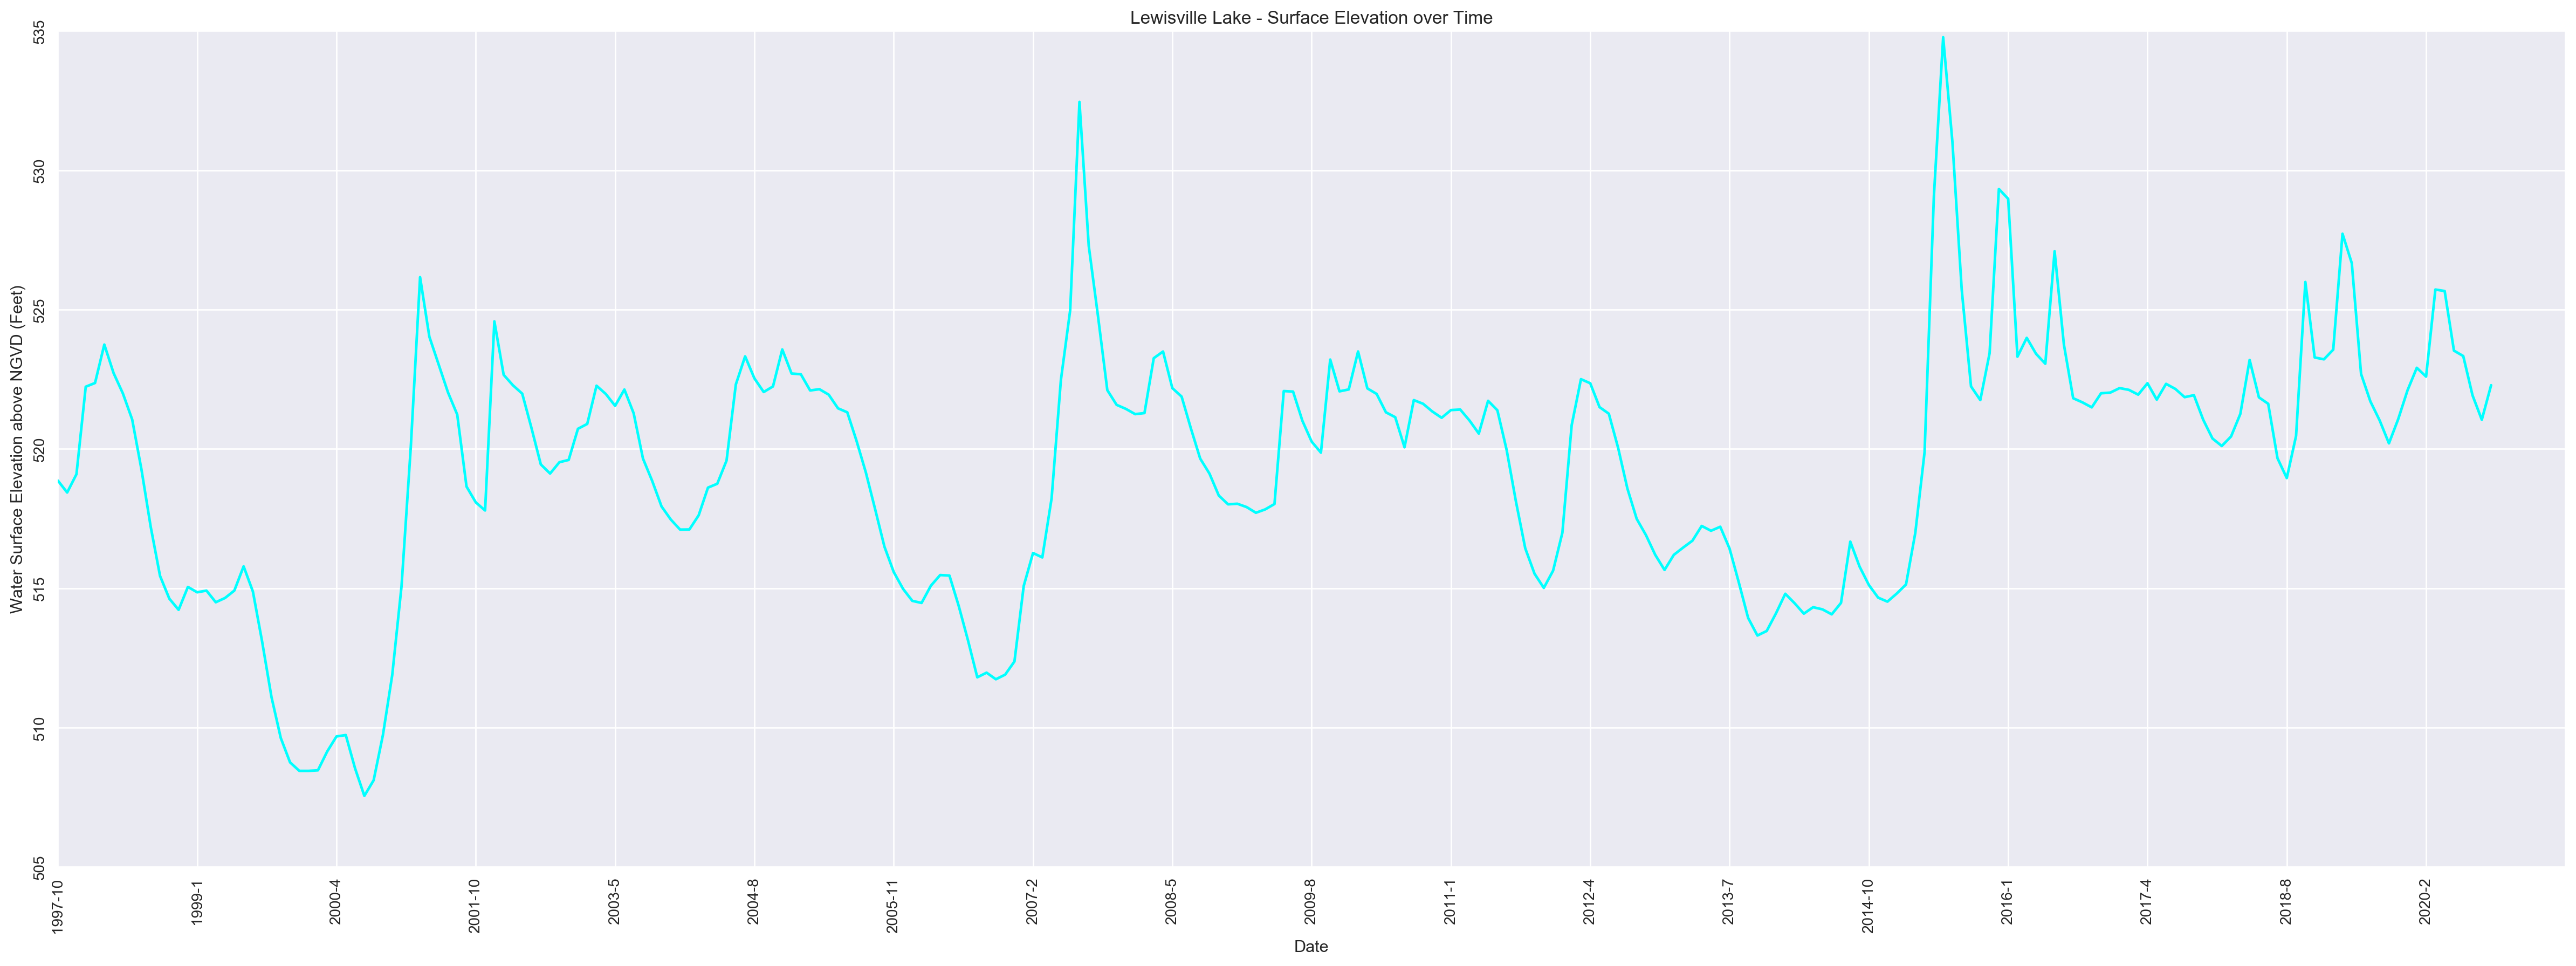

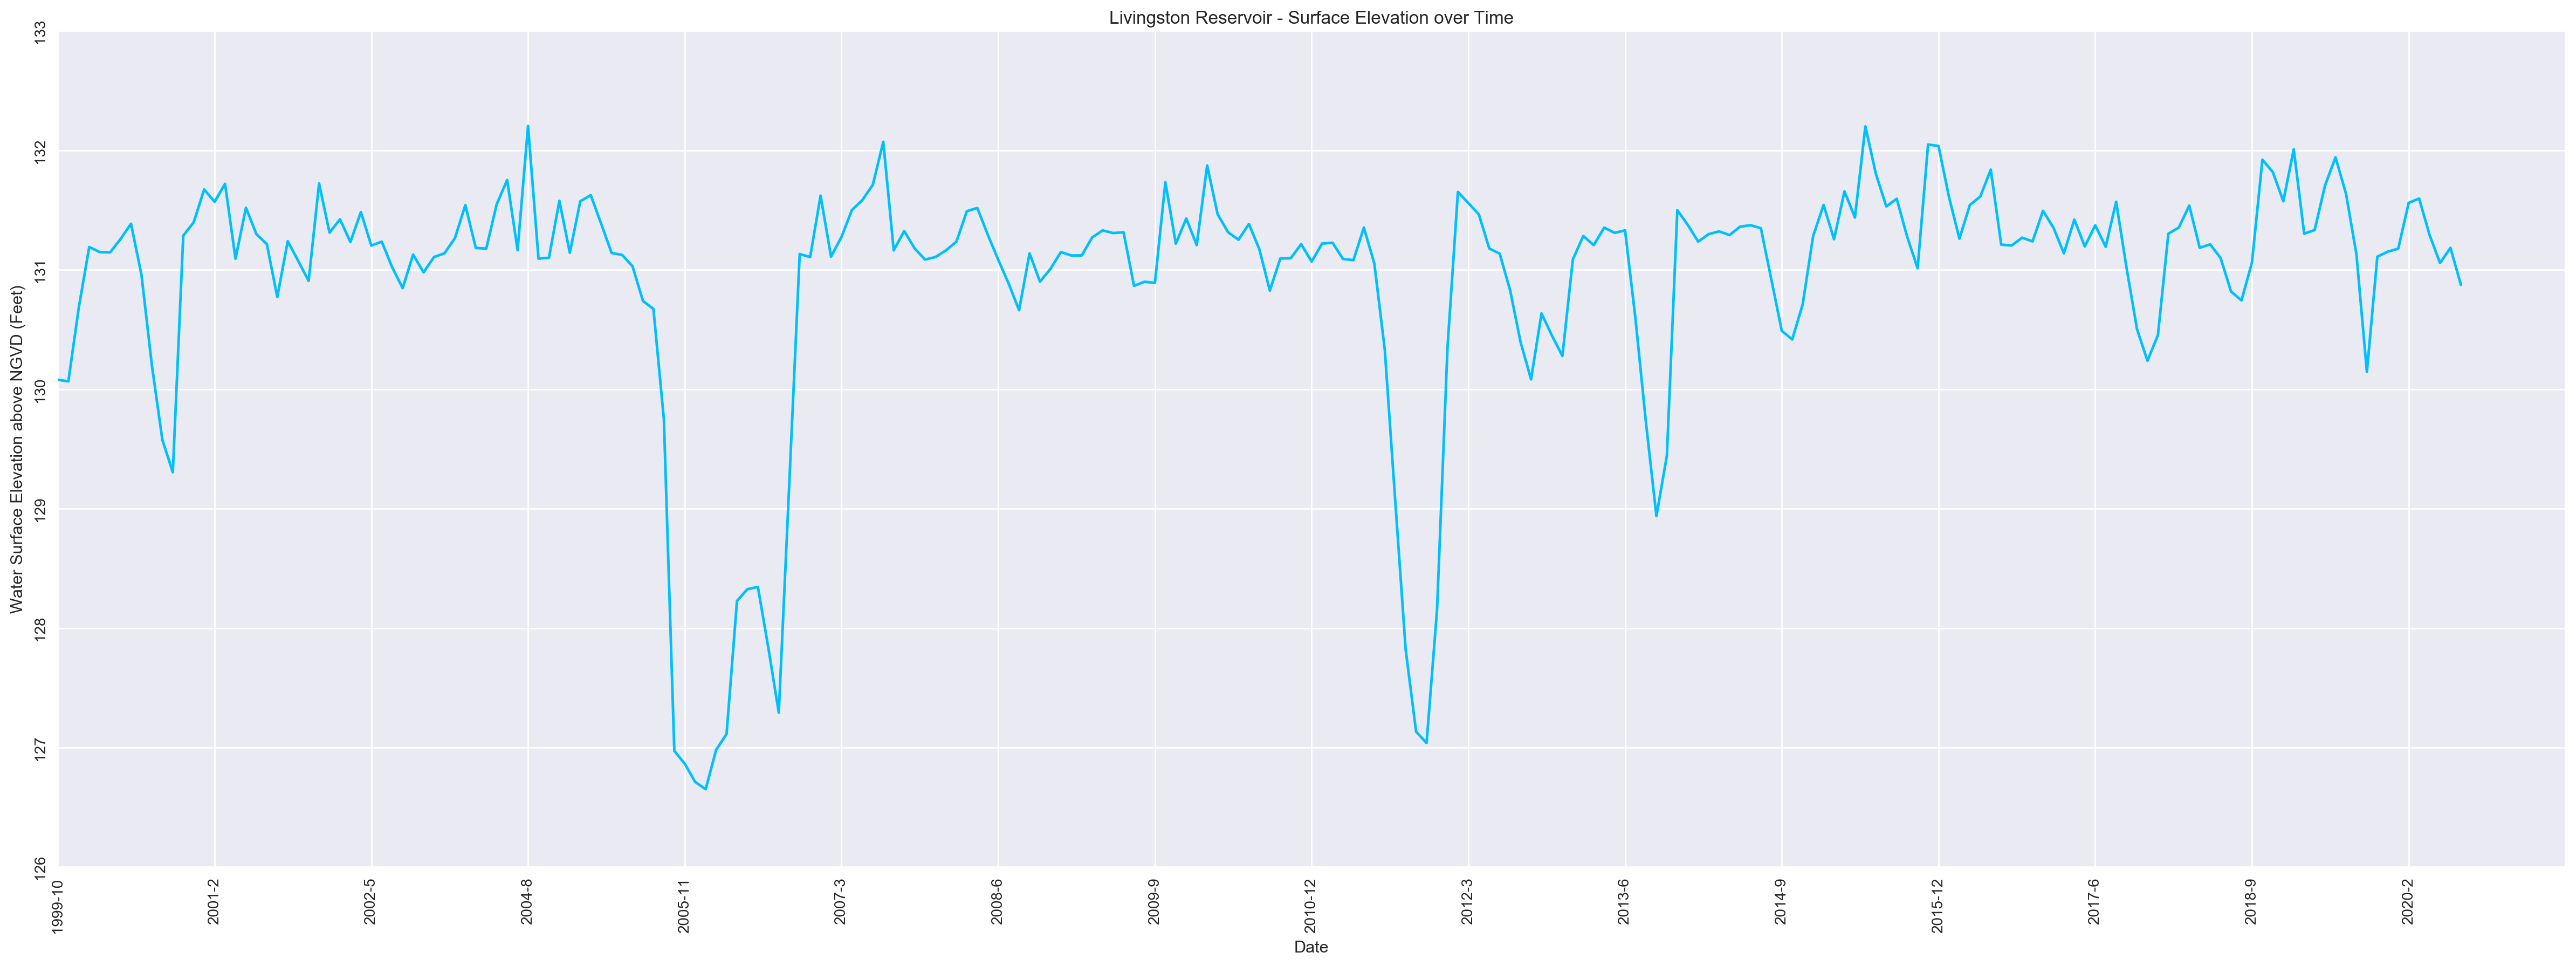

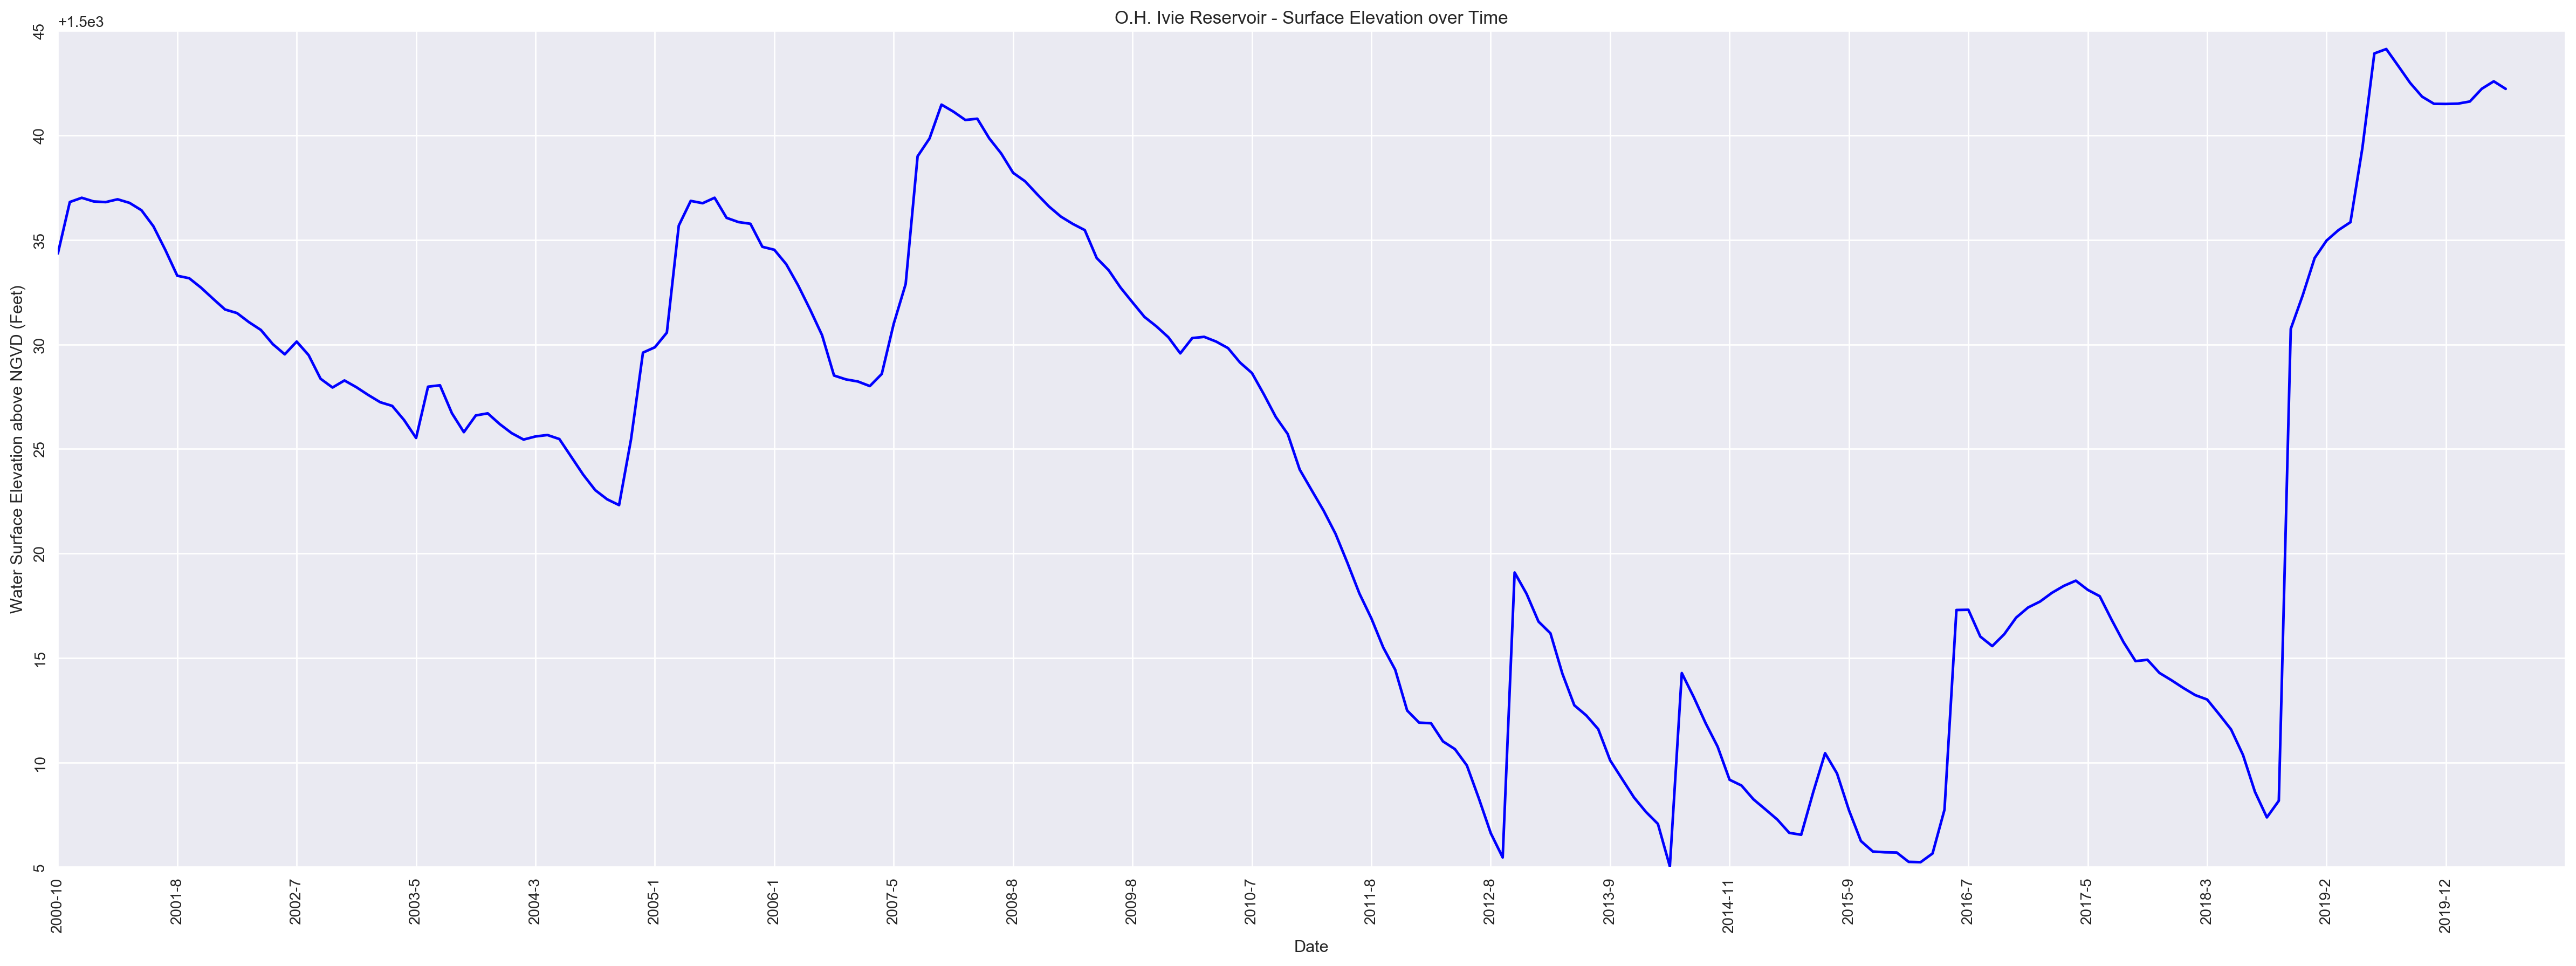

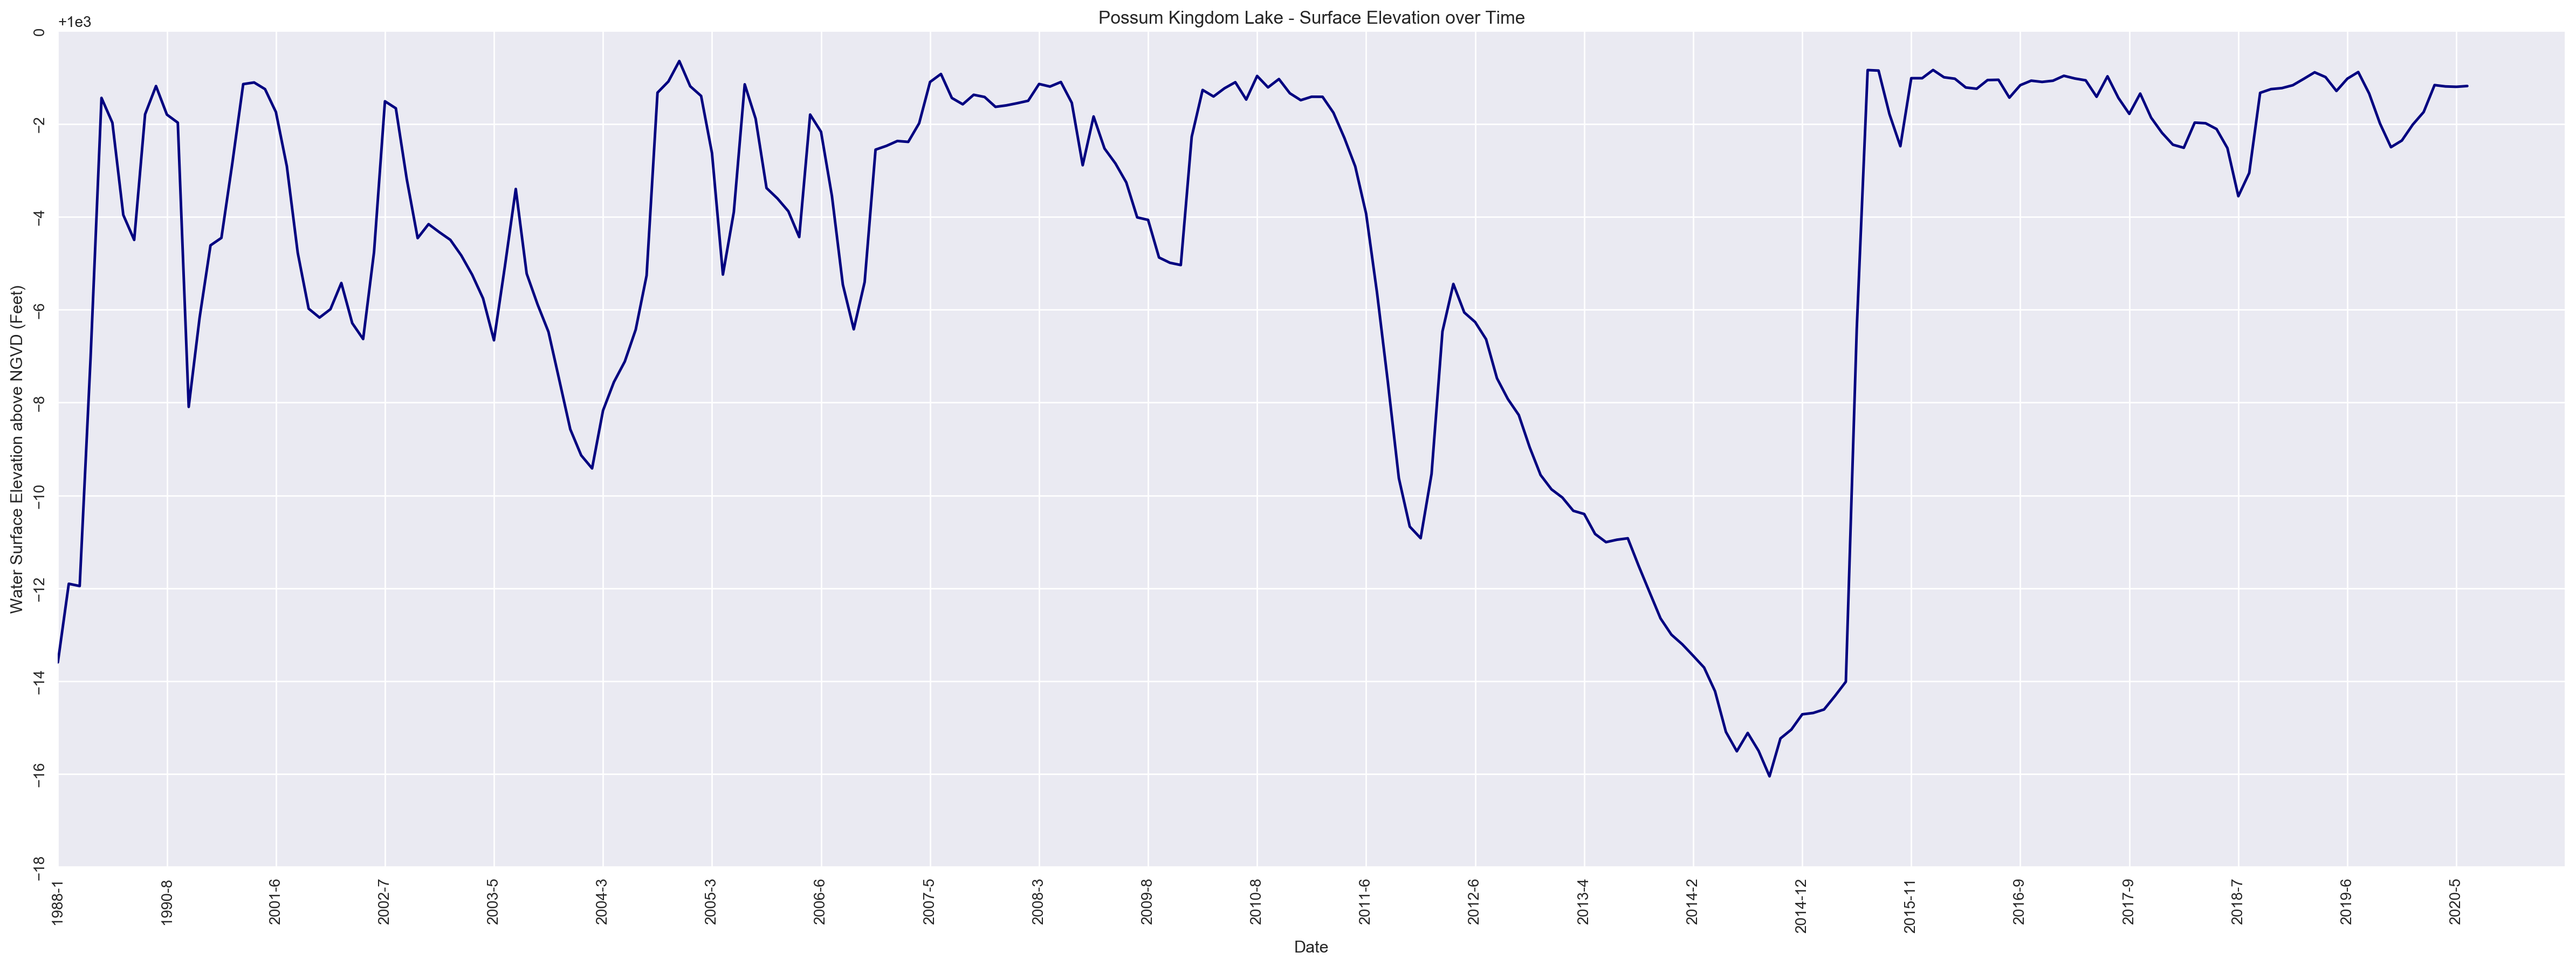

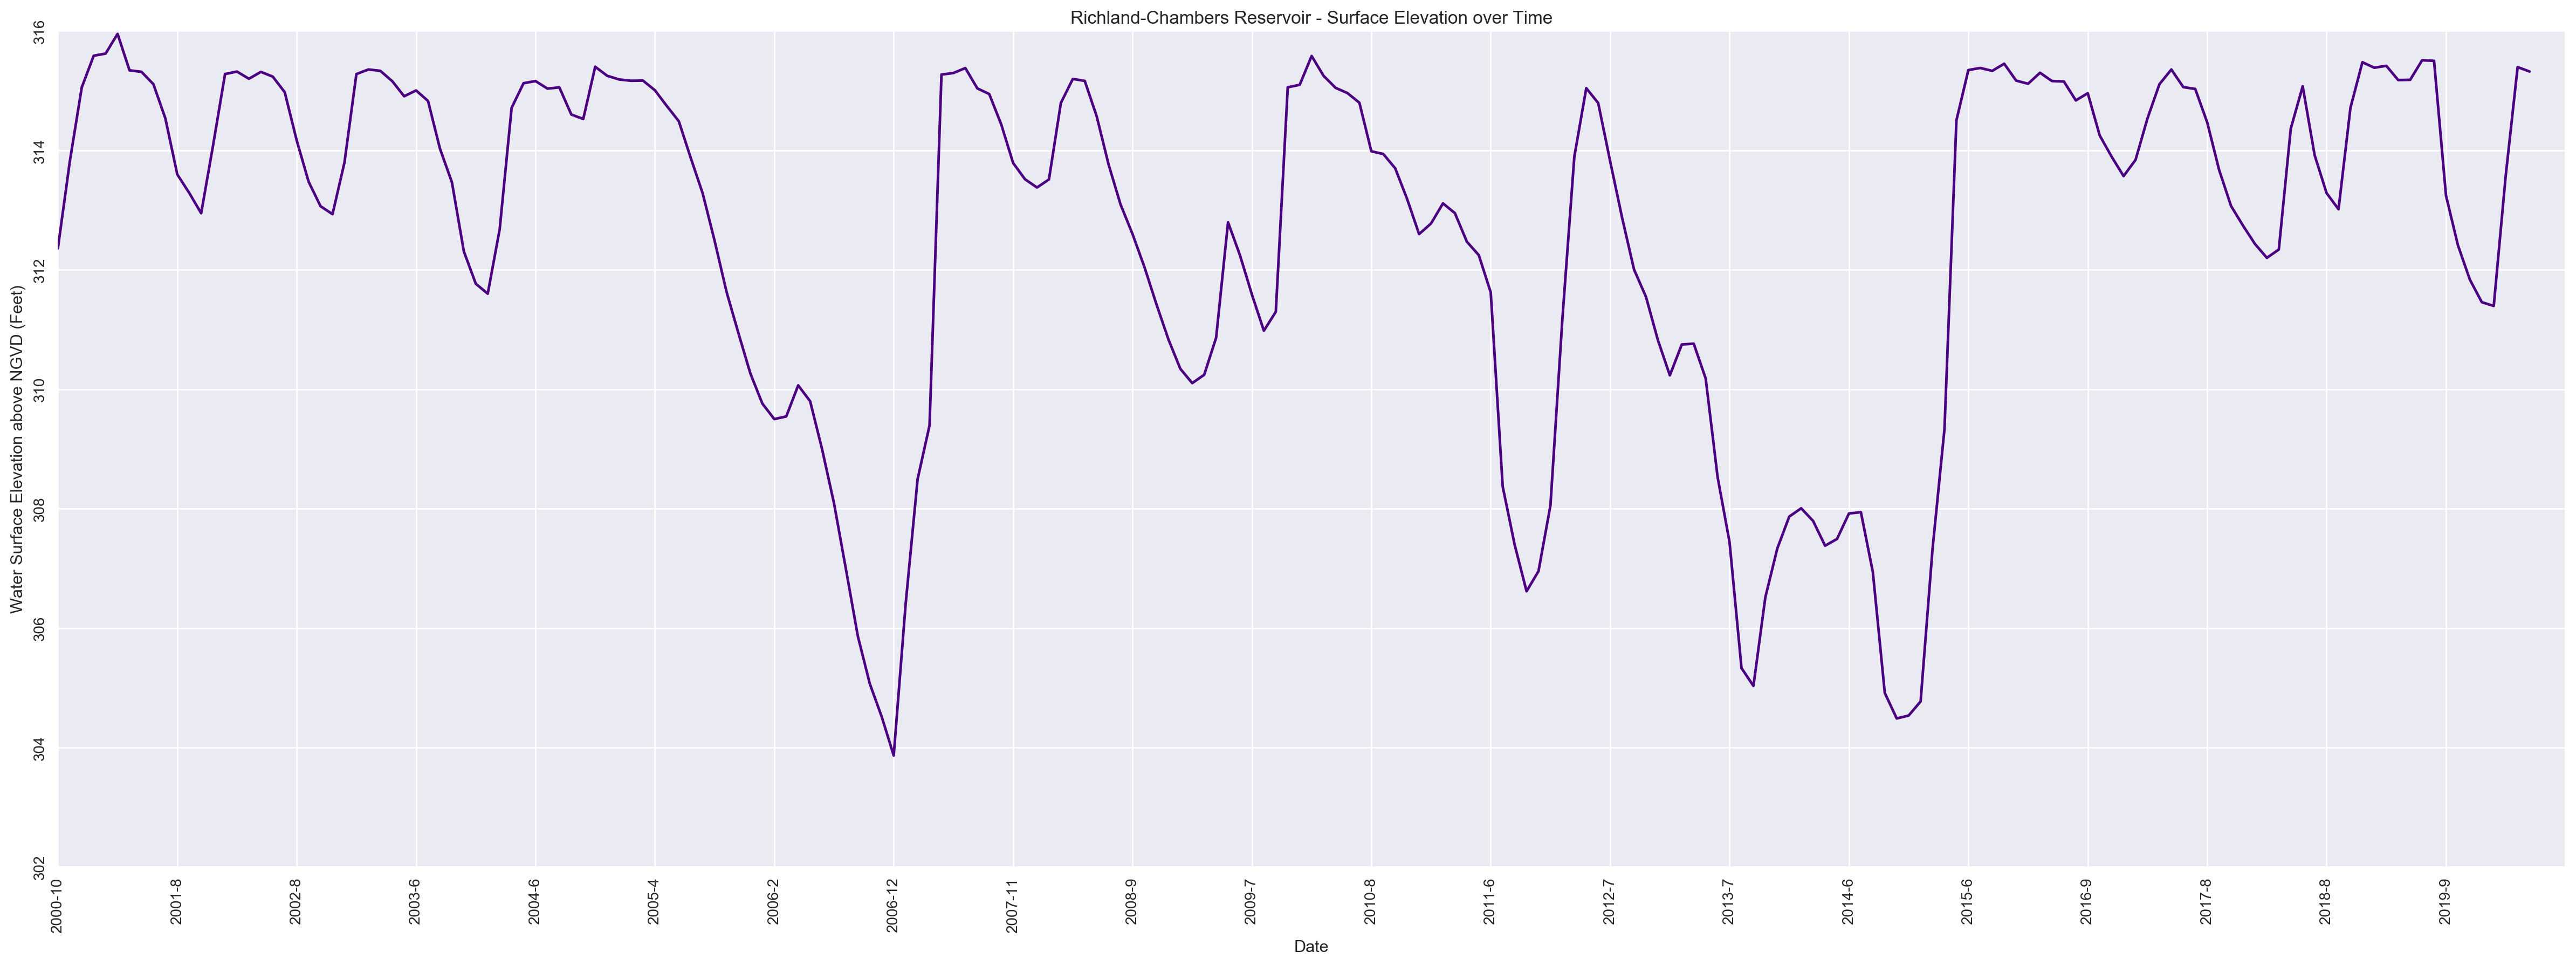

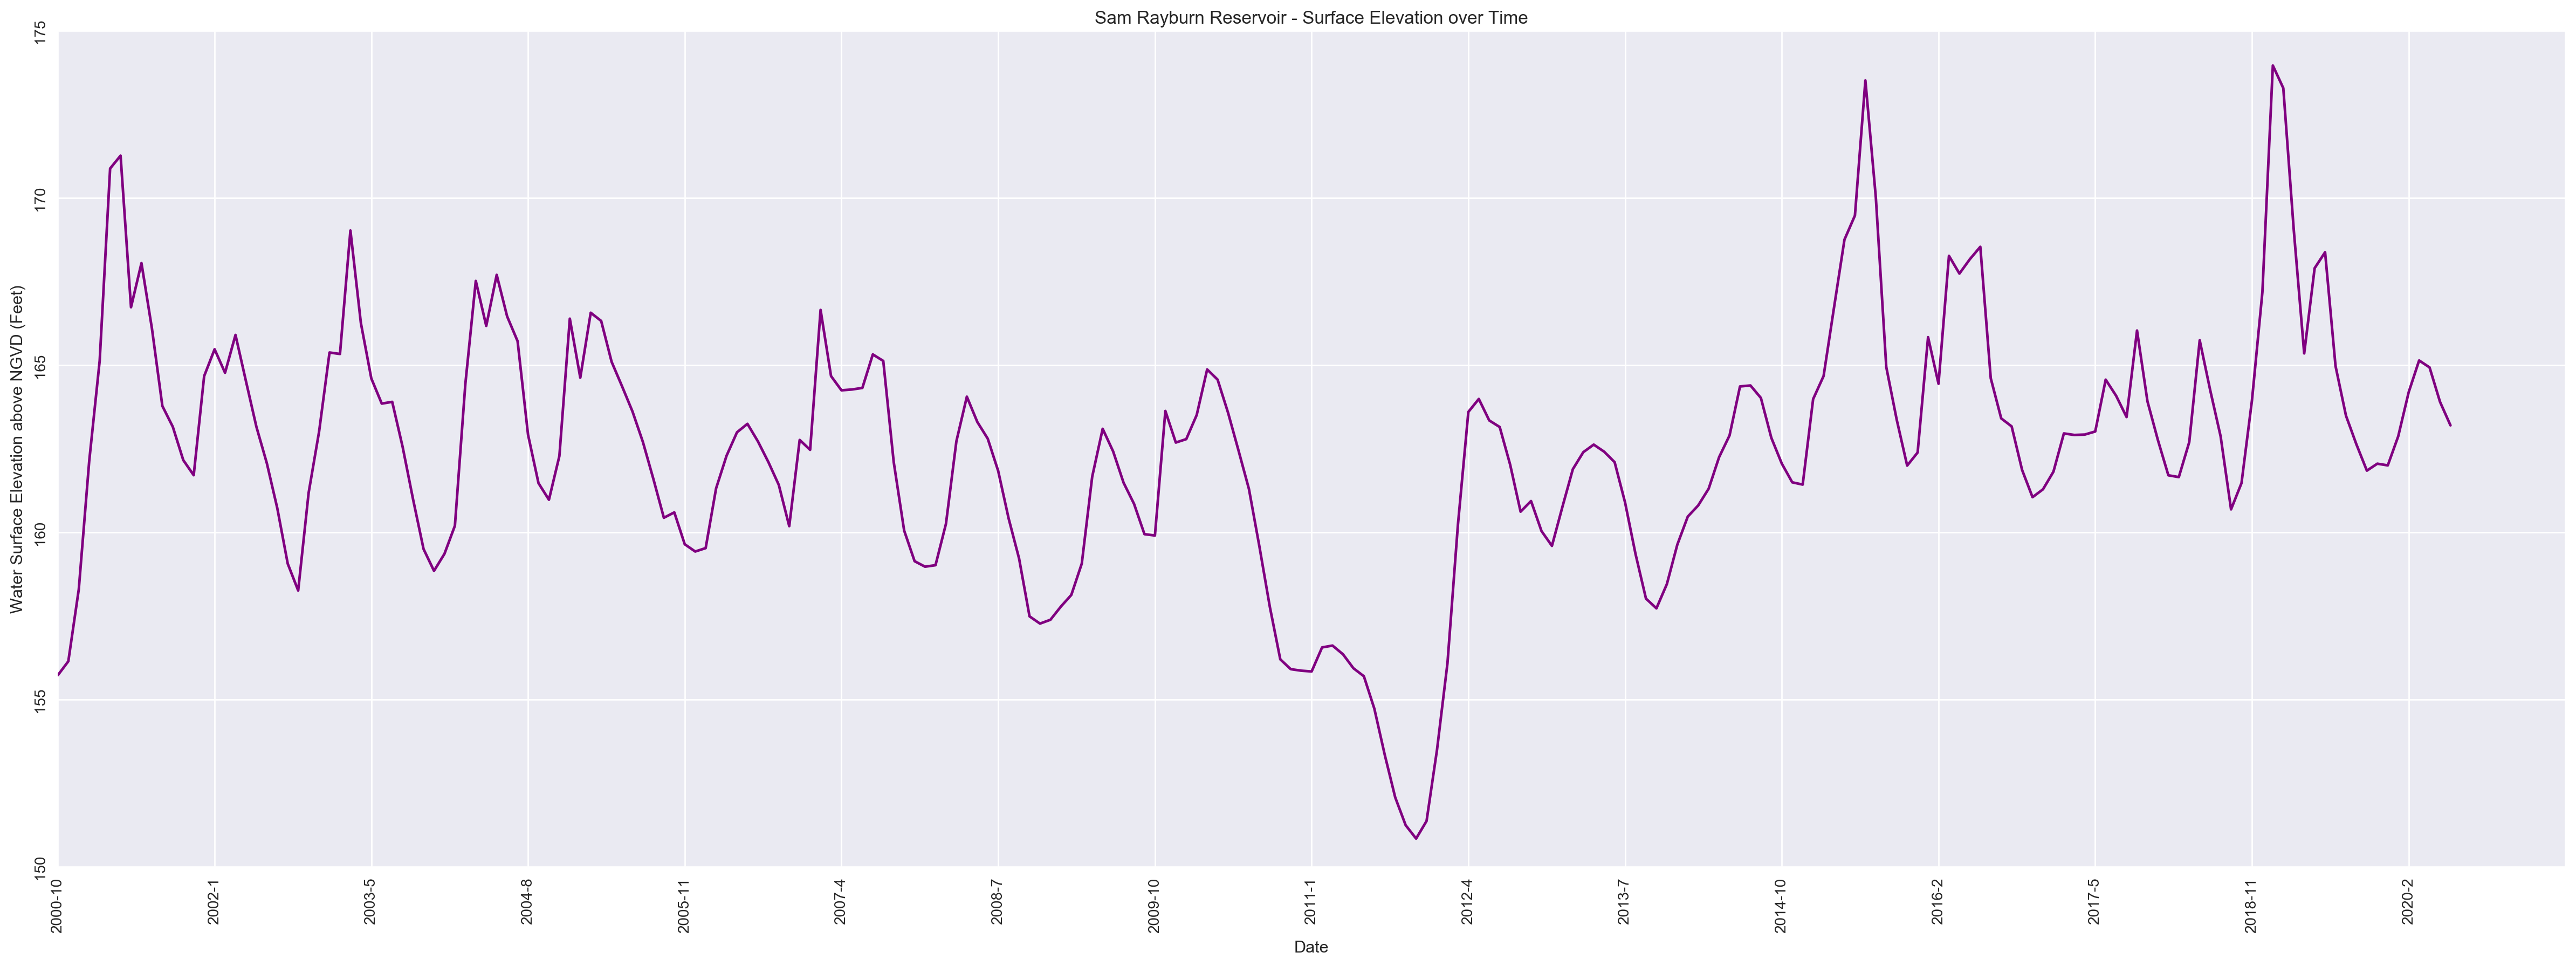

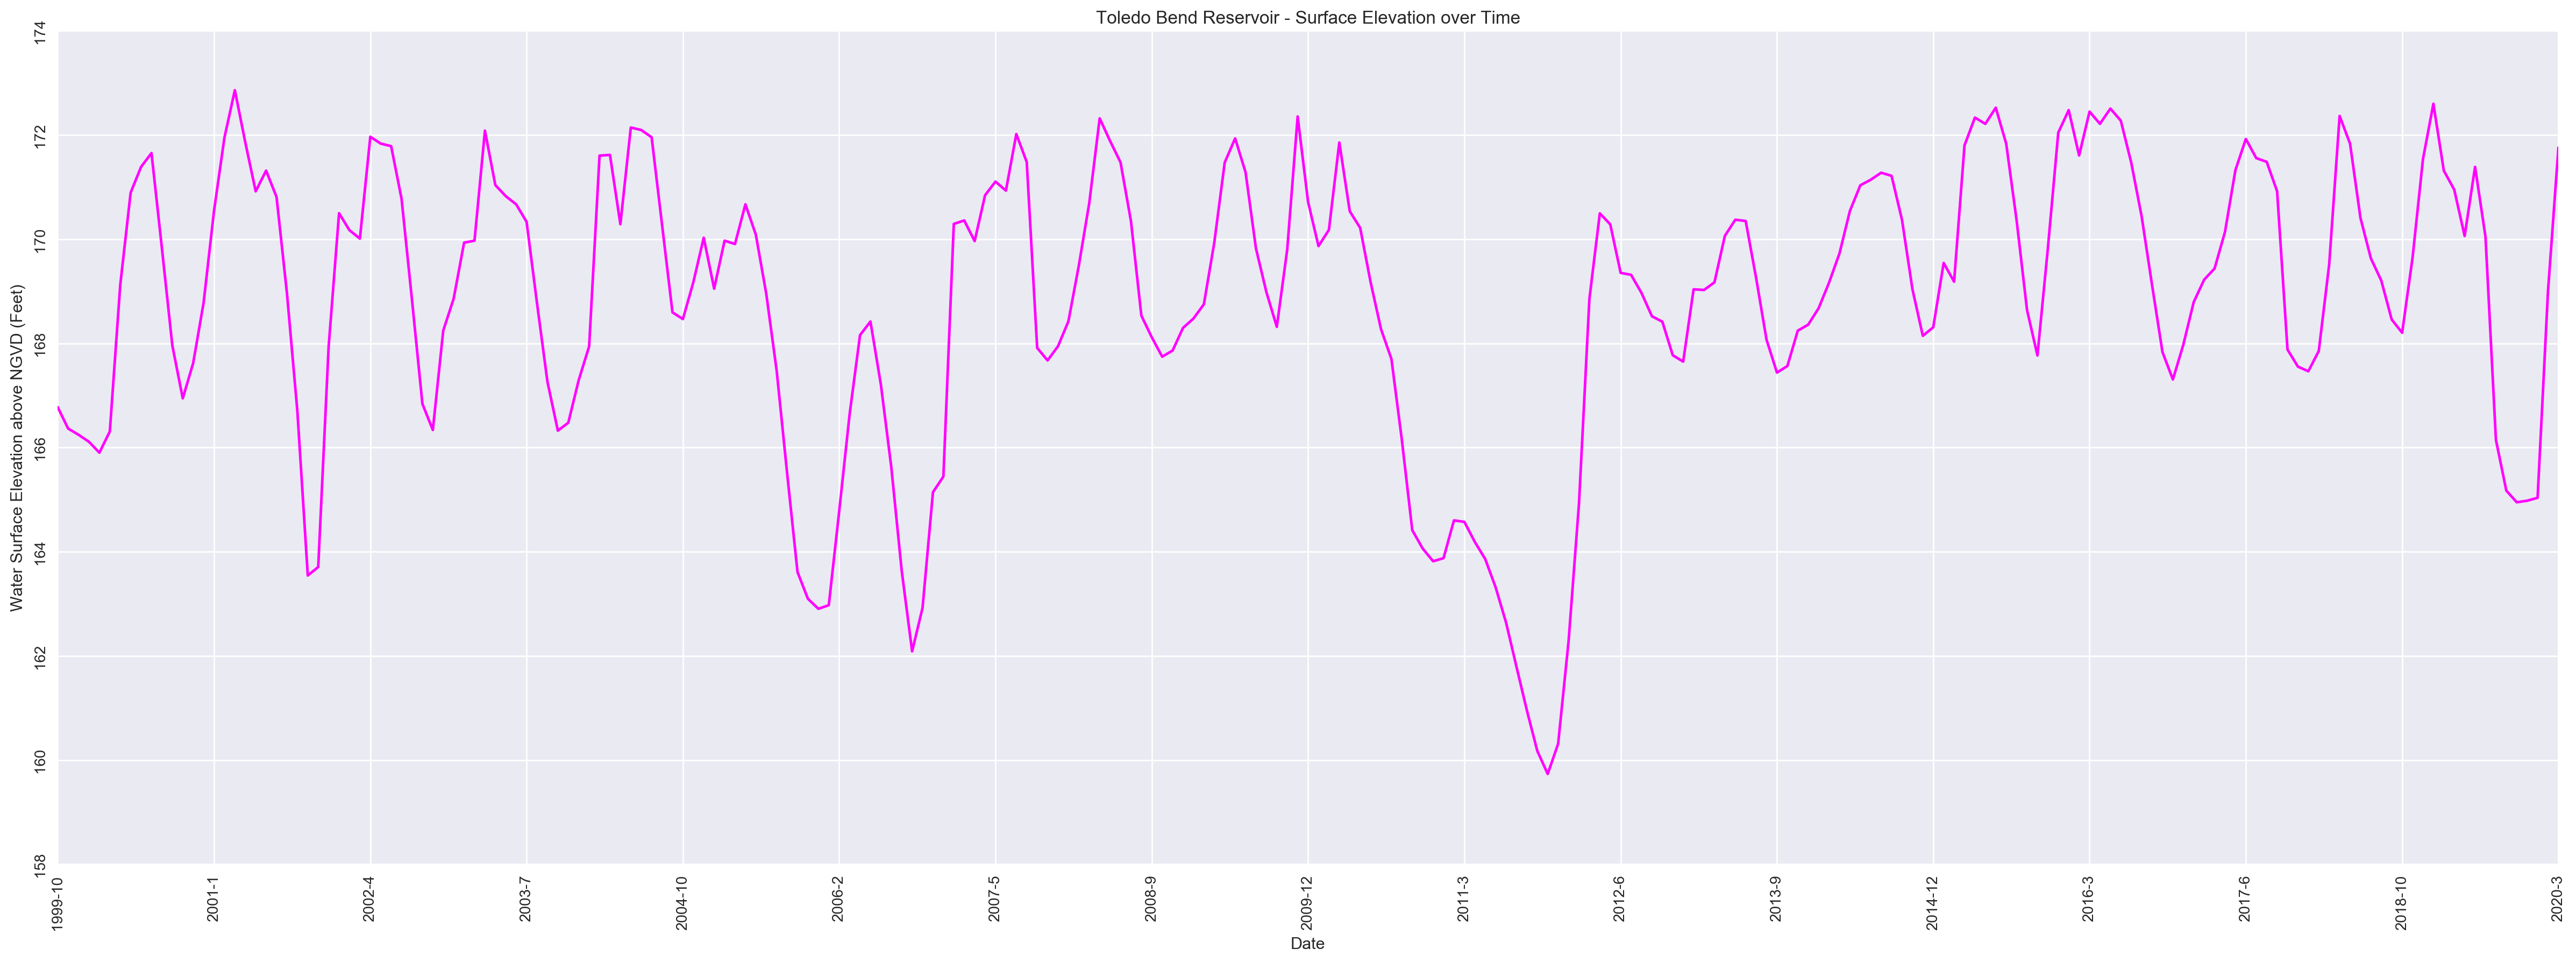

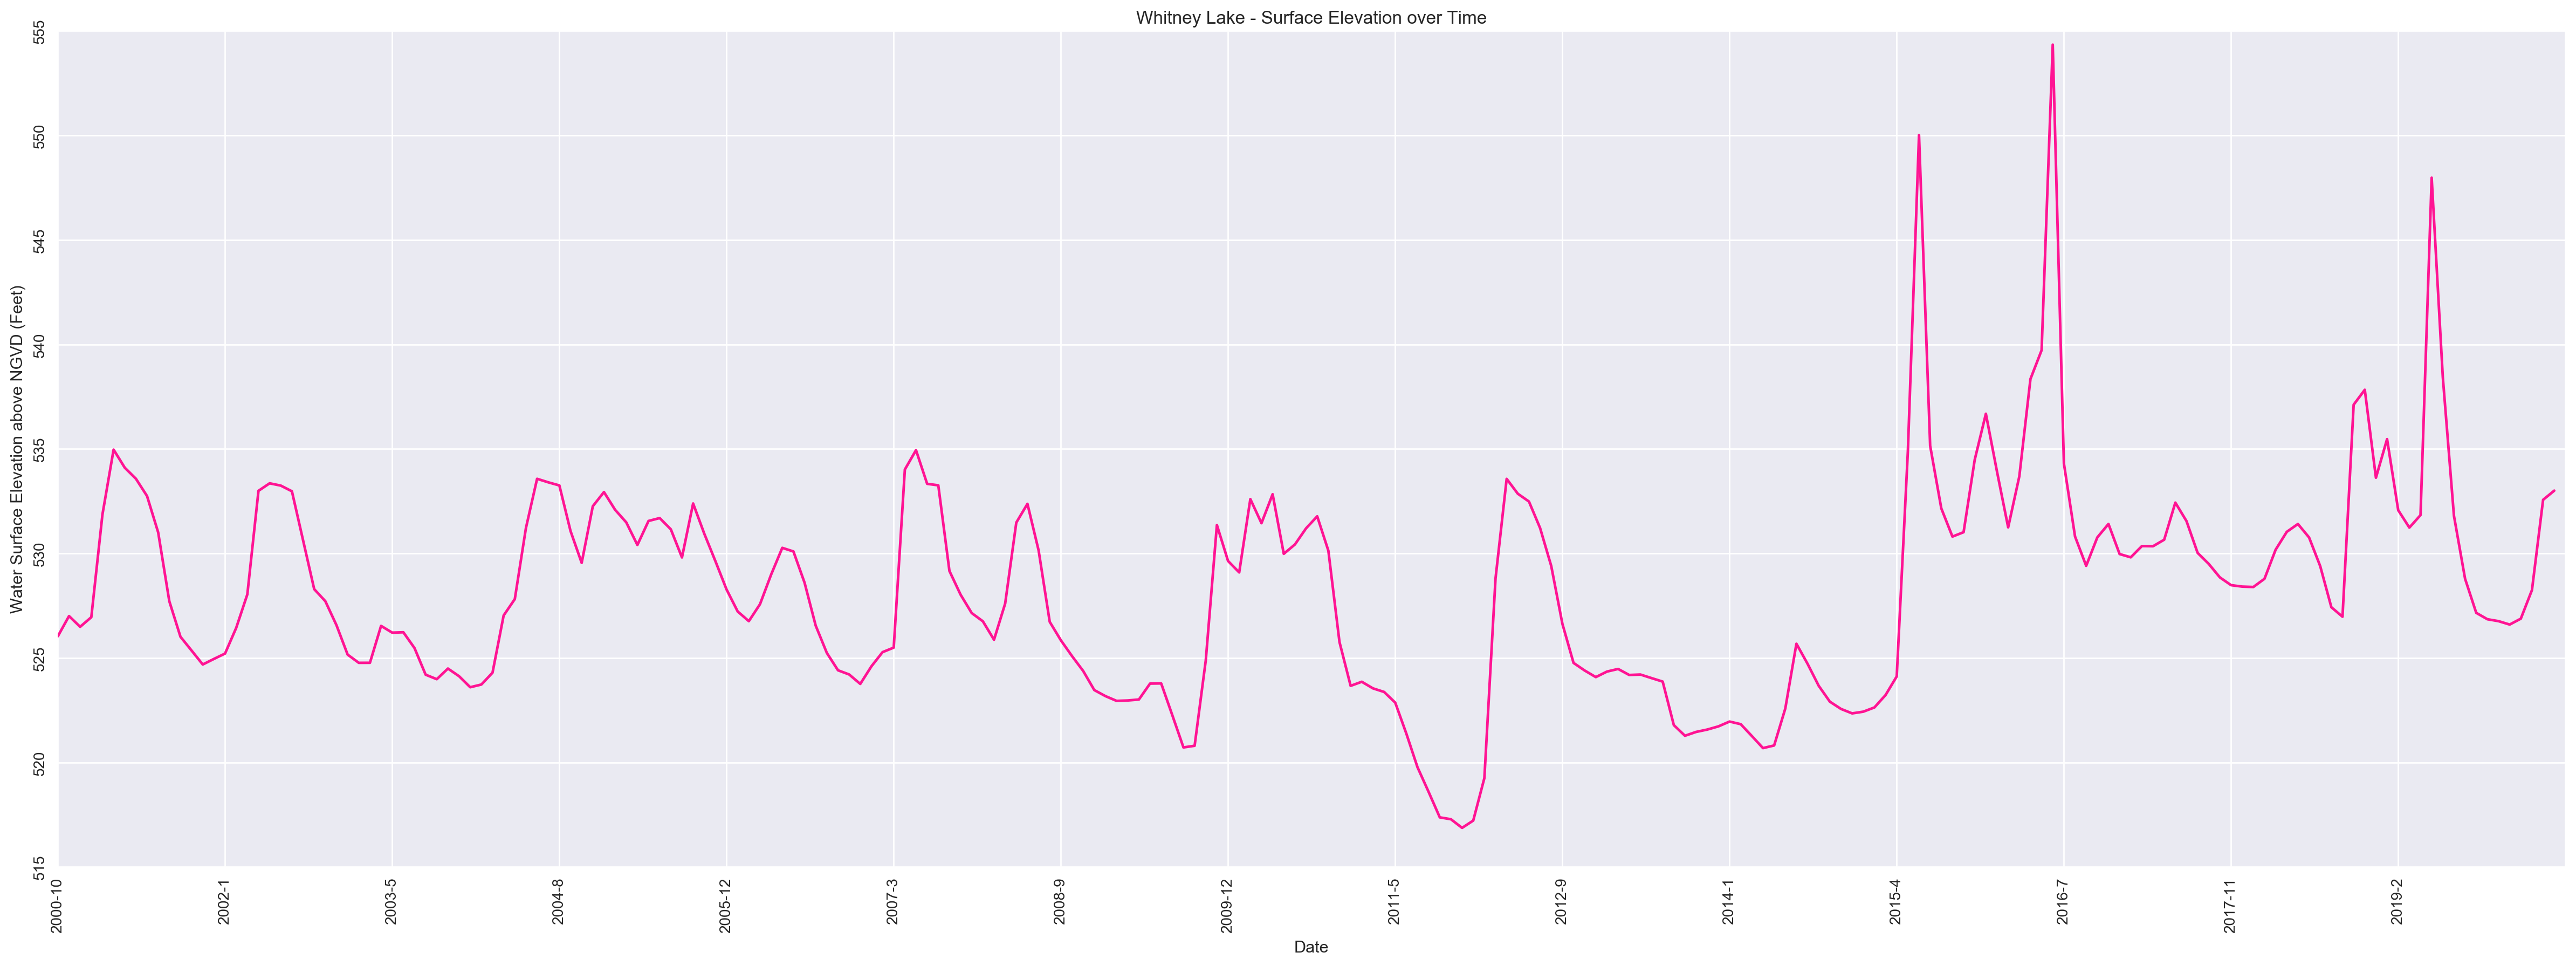

In [114]:
# Cleaner Styling
plt.style.use("seaborn")

# Comprehensive Lake Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Create Pivot table to plot all 19 lakes on one chart
Pivot_Prep_df = Final_Clean_Lakes_CSV[["Date", "lake_name", "mean_va"]]
Lakes_Pivot_Table = Pivot_Prep_df.pivot(index="Date", columns="lake_name", values="mean_va")

# Create Basic chart parameters
Lakes_Fig, Lakes_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Lakes_Ax.set_title("Lake Surface Elevation over Time")
Lakes_Ax.set_xlabel("Date")
Lakes_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
# Format X axis ticks for readability
Lakes_Ax.tick_params(labelrotation=90)
Lakes_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Lakes_Pivot_Table.columns.unique())))
# Create unique colors for usable legend
colors = ["black","grey","brown","chocolate","red","orangered","orange","yellow","lawngreen","olive","green","cyan","deepskyblue","blue","navy","indigo","purple","magenta","deeppink"]
colorCycle = (cycler(color=colors))
Lakes_Ax.set_prop_cycle(colorCycle)
# Plot chart and legend
Lakes_Ax.plot(Lakes_Pivot_Table)
Lakes_Ax.legend(Lakes_Pivot_Table.columns,loc="upper left")
# Save chart into assets to be pulled to site later
Lakes_Fig.savefig("../WEB DESIGN/assets/charts/Lakes_Fig.png")

# Belton Lake Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Belton_Fig, Belton_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Belton_Lake_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Belton Lake"]
Belton_Ax.set_title("Belton Lake - Surface Elevation over Time")
Belton_Ax.set_xlabel("Date")
Belton_Ax.tick_params(labelrotation=90)
Belton_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Belton_Lake_df["year_nu"].unique())))
Belton_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Belton_Ax.plot(Belton_Lake_df["Date"], Belton_Lake_df["mean_va"], color="black")
Belton_Fig.savefig("../WEB DESIGN/assets/charts/Belton_Fig.png")

# Canyon Lake Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Canyon_Fig, Canyon_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Canyon_Lake_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Canyon Lake"]
Canyon_Ax.set_title("Canyon Lake - Surface Elevation over Time")
Canyon_Ax.set_xlabel("Date")
Canyon_Ax.tick_params(labelrotation=90)
Canyon_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Canyon_Lake_df["year_nu"].unique())))
Canyon_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Canyon_Ax.plot(Canyon_Lake_df["Date"], Canyon_Lake_df["mean_va"], color="grey")
Canyon_Fig.savefig("../WEB DESIGN/assets/charts/Canyon_Fig.png")

# Cedar Creek Reservoir Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cedar_Creek_Fig, Cedar_Creek_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Cedar_Creek_Lake_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Cedar Creek Reservoir"]
Cedar_Creek_Ax.set_title("Cedar Creek Reservoir - Surface Elevation over Time")
Cedar_Creek_Ax.set_xlabel("Date")
Cedar_Creek_Ax.tick_params(labelrotation=90)
Cedar_Creek_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Cedar_Creek_Lake_df["year_nu"].unique())))
Cedar_Creek_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Cedar_Creek_Ax.plot(Cedar_Creek_Lake_df["Date"], Cedar_Creek_Lake_df["mean_va"], color="brown")
Cedar_Creek_Fig.savefig("../WEB DESIGN/assets/charts/Cedar_Creek_Fig.png")

# Choke Canyon Reservoir Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Choke_Canyon_Fig, Choke_Canyon_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Choke_Canyon_Lake_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Choke Canyon Reservoir"]
Choke_Canyon_Ax.set_title("Choke Canyon Reservoir - Surface Elevation over Time")
Choke_Canyon_Ax.set_xlabel("Date")
Choke_Canyon_Ax.tick_params(labelrotation=90)
Choke_Canyon_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Choke_Canyon_Lake_df["year_nu"].unique())))
Choke_Canyon_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Choke_Canyon_Ax.plot(Choke_Canyon_Lake_df["Date"], Choke_Canyon_Lake_df["mean_va"], color="chocolate")
Choke_Canyon_Fig.savefig("../WEB DESIGN/assets/charts/Choke_Canyon_Fig.png")

# Lake Conroe Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Conroe_Fig, Conroe_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Lake_Conroe_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Lake Conroe"]
Conroe_Ax.set_title("Lake Conroe - Surface Elevation over Time")
Conroe_Ax.set_xlabel("Date")
Conroe_Ax.tick_params(labelrotation=90)
Conroe_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Lake_Conroe_df["year_nu"].unique())))
Conroe_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Conroe_Ax.plot(Lake_Conroe_df["Date"], Lake_Conroe_df["mean_va"], color="red")
Conroe_Fig.savefig("../WEB DESIGN/assets/charts/Conroe_Fig.png")

# Lake Fork Reservoir Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Fork_Fig, Fork_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Lake_Fork_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Lake Fork Reservoir"]
Fork_Ax.set_title("Lake Fork Reservoir - Surface Elevation over Time")
Fork_Ax.set_xlabel("Date")
Fork_Ax.tick_params(labelrotation=90)
Fork_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Lake_Fork_df["year_nu"].unique())))
Fork_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Fork_Ax.plot(Lake_Fork_df["Date"], Lake_Fork_df["mean_va"], color="orangered")
Fork_Fig.savefig("../WEB DESIGN/assets/charts/Fork_Fig.png")

# Lake Meredith Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Meredith_Fig, Meredith_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Lake_Meredith_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Lake Meredith"]
Meredith_Ax.set_title("Lake Meredith - Surface Elevation over Time")
Meredith_Ax.set_xlabel("Date")
Meredith_Ax.tick_params(labelrotation=90)
Meredith_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Lake_Meredith_df["year_nu"].unique())))
Meredith_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Meredith_Ax.plot(Lake_Meredith_df["Date"], Lake_Meredith_df["mean_va"], color="orange")
Meredith_Fig.savefig("../WEB DESIGN/assets/charts/Meredith_Fig.png")

# Lake Palestine Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Palestine_Fig, Palestine_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Lake_Palestine_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Lake Palestine"]
Palestine_Ax.set_title("Lake Palestine - Surface Elevation over Time")
Palestine_Ax.set_xlabel("Date")
Palestine_Ax.tick_params(labelrotation=90)
Palestine_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Lake_Palestine_df["year_nu"].unique())))
Palestine_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Palestine_Ax.plot(Lake_Palestine_df["Date"], Lake_Palestine_df["mean_va"], color="yellow")
Palestine_Fig.savefig("../WEB DESIGN/assets/charts/Palestine_Fig.png")

# Lake Ray Hubbard Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Ray_Hubbard_Fig, Ray_Hubbard_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Lake_Ray_Hubbard_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Lake Ray Hubbard"]
Ray_Hubbard_Ax.set_title("Lake Ray Hubbard - Surface Elevation over Time")
Ray_Hubbard_Ax.set_xlabel("Date")
Ray_Hubbard_Ax.tick_params(labelrotation=90)
Ray_Hubbard_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Lake_Ray_Hubbard_df["year_nu"].unique())))
Ray_Hubbard_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Ray_Hubbard_Ax.plot(Lake_Ray_Hubbard_df["Date"], Lake_Ray_Hubbard_df["mean_va"], color="lawngreen")
Ray_Hubbard_Fig.savefig("../WEB DESIGN/assets/charts/Ray_Hubbard_Fig.png")

# Lake Tawakoni Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Tawakoni_Fig, Tawakoni_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Lake_Tawakoni_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Lake Tawakoni"]
Tawakoni_Ax.set_title("Lake Tawakoni - Surface Elevation over Time")
Tawakoni_Ax.set_xlabel("Date")
Tawakoni_Ax.tick_params(labelrotation=90)
Tawakoni_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Lake_Tawakoni_df["year_nu"].unique())))
Tawakoni_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Tawakoni_Ax.plot(Lake_Tawakoni_df["Date"], Lake_Tawakoni_df["mean_va"], color="olive")
Tawakoni_Fig.savefig("../WEB DESIGN/assets/charts/Tawakoni_Fig.png")

# Lavon Lake Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Lavon_Fig, Lavon_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Lavon_Lake_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Lavon Lake"]
Lavon_Ax.set_title("Lavon Lake - Surface Elevation over Time")
Lavon_Ax.set_xlabel("Date")
Lavon_Ax.tick_params(labelrotation=90)
Lavon_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Lavon_Lake_df["year_nu"].unique())))
Lavon_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Lavon_Ax.plot(Lavon_Lake_df["Date"], Lavon_Lake_df["mean_va"], color="green")
Lavon_Fig.savefig("../WEB DESIGN/assets/charts/Lavon_Fig.png")

# Lewisville Lake Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Lewisville_Fig, Lewisville_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Lewisville_Lake_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Lewisville Lake"]
Lewisville_Ax.set_title("Lewisville Lake - Surface Elevation over Time")
Lewisville_Ax.set_xlabel("Date")
Lewisville_Ax.tick_params(labelrotation=90)
Lewisville_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Lewisville_Lake_df["year_nu"].unique())))
Lewisville_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Lewisville_Ax.plot(Lewisville_Lake_df["Date"], Lewisville_Lake_df["mean_va"], color="cyan")
Lewisville_Fig.savefig("../WEB DESIGN/assets/charts/Lewisville_Fig.png")

# Livingston Reservoir Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Livingston_Fig, Livingston_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Livingston_Lake_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Livingston Reservoir"]
Livingston_Ax.set_title("Livingston Reservoir - Surface Elevation over Time")
Livingston_Ax.set_xlabel("Date")
Livingston_Ax.tick_params(labelrotation=90)
Livingston_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Livingston_Lake_df["year_nu"].unique())))
Livingston_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Livingston_Ax.plot(Livingston_Lake_df["Date"], Livingston_Lake_df["mean_va"], color="deepskyblue")
Livingston_Fig.savefig("../WEB DESIGN/assets/charts/Livingston_Fig.png")

# O.H. Ivie Reservoir Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Ivie_Fig, Ivie_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Ivie_Lake_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "O.H. Ivie Reservoir"]
Ivie_Ax.set_title("O.H. Ivie Reservoir - Surface Elevation over Time")
Ivie_Ax.set_xlabel("Date")
Ivie_Ax.tick_params(labelrotation=90)
Ivie_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Ivie_Lake_df["year_nu"].unique())))
Ivie_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Ivie_Ax.plot(Ivie_Lake_df["Date"], Ivie_Lake_df["mean_va"], color="blue")
Ivie_Fig.savefig("../WEB DESIGN/assets/charts/Ivie_Fig.png")

# Possum Kingdom Lake Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Possum_Kingdom_Fig, Possum_Kingdom_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Possum_Kingdom_Lake_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Possum Kingdom Lake"]
Possum_Kingdom_Ax.set_title("Possum Kingdom Lake - Surface Elevation over Time")
Possum_Kingdom_Ax.set_xlabel("Date")
Possum_Kingdom_Ax.tick_params(labelrotation=90)
Possum_Kingdom_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Possum_Kingdom_Lake_df["year_nu"].unique())))
Possum_Kingdom_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Possum_Kingdom_Ax.plot(Possum_Kingdom_Lake_df["Date"], Possum_Kingdom_Lake_df["mean_va"], color="navy")
Possum_Kingdom_Fig.savefig("../WEB DESIGN/assets/charts/Possum_Kingdom_Fig.png")

# Richland-Chambers Reservoir Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Richland_Chambers_Fig, Richland_Chambers_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Richland_Chambers_Lake_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Richland-Chambers Reservoir"]
Richland_Chambers_Ax.set_title("Richland-Chambers Reservoir - Surface Elevation over Time")
Richland_Chambers_Ax.set_xlabel("Date")
Richland_Chambers_Ax.tick_params(labelrotation=90)
Richland_Chambers_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Richland_Chambers_Lake_df["year_nu"].unique())))
Richland_Chambers_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Richland_Chambers_Ax.plot(Richland_Chambers_Lake_df["Date"], Richland_Chambers_Lake_df["mean_va"], color="indigo")
Richland_Chambers_Fig.savefig("../WEB DESIGN/assets/charts/Richland_Chambers_Fig.png")

# Sam Rayburn Reservoir Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Sam_Rayburn_Fig, Sam_Rayburn_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Sam_Rayburn_Lake_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Sam Rayburn Reservoir"]
Sam_Rayburn_Ax.set_title("Sam Rayburn Reservoir - Surface Elevation over Time")
Sam_Rayburn_Ax.set_xlabel("Date")
Sam_Rayburn_Ax.tick_params(labelrotation=90)
Sam_Rayburn_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Sam_Rayburn_Lake_df["year_nu"].unique())))
Sam_Rayburn_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Sam_Rayburn_Ax.plot(Sam_Rayburn_Lake_df["Date"], Sam_Rayburn_Lake_df["mean_va"], color="purple")
Sam_Rayburn_Fig.savefig("../WEB DESIGN/assets/charts/Sam_Rayburn_Fig.png")

# Toledo Bend Reservoir Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Toledo_Bend_Fig, Toledo_Bend_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Toledo_Bend_Lake_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Toledo Bend Reservoir"]
Toledo_Bend_Ax.set_title("Toledo Bend Reservoir - Surface Elevation over Time")
Toledo_Bend_Ax.set_xlabel("Date")
Toledo_Bend_Ax.tick_params(labelrotation=90)
Toledo_Bend_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Toledo_Bend_Lake_df["year_nu"].unique())))
Toledo_Bend_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Toledo_Bend_Ax.plot(Toledo_Bend_Lake_df["Date"], Toledo_Bend_Lake_df["mean_va"], color="magenta")
Toledo_Bend_Fig.savefig("../WEB DESIGN/assets/charts/Toledo_Bend_Fig.png")

# Whitney Lake Chart ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Whitney_Fig, Whitney_Ax = plt.subplots(figsize = (30,10), dpi = 200)
Whitney_Lake_df = Final_Clean_Lakes_CSV.loc[Final_Clean_Lakes_CSV["lake_name"] == "Whitney Lake"]
Whitney_Ax.set_title("Whitney Lake - Surface Elevation over Time")
Whitney_Ax.set_xlabel("Date")
Whitney_Ax.tick_params(labelrotation=90)
Whitney_Ax.xaxis.set_major_locator(plt.MaxNLocator(len(Whitney_Lake_df["year_nu"].unique())))
Whitney_Ax.set_ylabel("Water Surface Elevation above NGVD (Feet)")
Whitney_Ax.plot(Whitney_Lake_df["Date"], Whitney_Lake_df["mean_va"], color="deeppink")
Whitney_Fig.savefig("../WEB DESIGN/assets/charts/Whitney_Fig.png")

In [115]:
# Rivers Charts
parameters = {gage_height: 65, discharge: 60}

heading = ["Upstream", "Downstream"]



NameError: name 'gage_height' is not defined